1.1.0


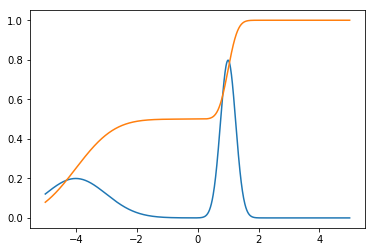

[ 1.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  3.  1.  1.  0.  2.  0.
  1.  3.  2.  3.  0.  1.  1.  3.  0.  0.  1.  0.  3.  2.  0.  1.  1.  3.
  1.  3.  0.  0.  0.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  3.  8.
  2.  3.  7.  2. 10.  8.  5.  3.  0.  1.]
(10000, 100)


In [2]:
import numpy as np
import scipy as sc
import scipy.stats as sct
import matplotlib.pyplot as plt
print(sc.version.full_version) # 1.1.0

X = np.arange(-5,5,0.01)
mu1 = 1
sigma1 = 0.25
mu2 = -4.
sigma2 = 1.

bi_pdf = (sct.norm.pdf(X,loc=mu1,scale=sigma1)+sct.norm.pdf(X,loc=mu2,scale=sigma2))/2.
bi_cdf = (sct.norm.cdf(X,loc=mu1,scale=sigma1)+sct.norm.cdf(X,loc=mu2,scale=sigma2))/2.
plt.plot(X,bi_pdf)
plt.plot(X,bi_cdf)

plt.show()

def gen_bi_vec(n = 100, m = 100, mu1 = 0.0, sigma1 = 1.0, mu2 = 0.0, sigma2 = 1.0):
    vec = np.zeros(n)
    #test = np.random.rand(m)
    #invtest = (sct.norm.ppf(test,loc = mu1, scale = sigma1)+sct.norm.ppf(test,loc = mu2, scale = sigma2))/2.
    #invtest = (invtest*10+50).astype(int)
    w = np.random.binomial(1,p=0.5,size = m)
    invtest = w*np.random.normal(loc = mu1, scale = sigma1,size = m)+(1-w)*np.random.normal(loc = mu2, scale = sigma2,size=m)
    a = np.min(invtest)
    b = np.max(invtest)
    invtest = (invtest - a)*(n-1)/(b-a)
    invtest = invtest.astype(int)   
    for i in range(m):
        vec[invtest[i]] = np.count_nonzero(invtest == invtest[i])
    return vec

#toto = gen_bi_vec(n=100,m=100, mu1 = mu1, sigma1 = sigma1, mu2 = mu2, sigma2 = sigma2)
#print(toto)
#plt.plot(toto)

train_size = 10000
n = 100
X_train = np.zeros((train_size,n))
# Make training set
for i in range(train_size):
    X_train[i,:] = gen_bi_vec(n=100,m=100, mu1 = mu1, sigma1 = sigma1, mu2 = mu2, sigma2 = sigma2)
print(X_train[0])
#X_train = (X_train - np.mean(X_train,axis=0))
print(X_train.shape);

#plt.figure(figsize=(10,10))
#for i in range(16):
#    plt.subplot(4, 4,i+1)
#    plt.plot(X_train[i])
#    plt.axis('off')
#plt.tight_layout()

Epochs: 200
Batch size: 100
Batches per epoch: 100
--------------- Epoch 1 ---------------
--------------- Epoch 2 ---------------
--------------- Epoch 3 ---------------
--------------- Epoch 4 ---------------
--------------- Epoch 5 ---------------
--------------- Epoch 6 ---------------
--------------- Epoch 7 ---------------
--------------- Epoch 8 ---------------
--------------- Epoch 9 ---------------
--------------- Epoch 10 ---------------
--------------- Epoch 11 ---------------
--------------- Epoch 12 ---------------
--------------- Epoch 13 ---------------
--------------- Epoch 14 ---------------
--------------- Epoch 15 ---------------
--------------- Epoch 16 ---------------
--------------- Epoch 17 ---------------
--------------- Epoch 18 ---------------
--------------- Epoch 19 ---------------
--------------- Epoch 20 ---------------
--------------- Epoch 21 ---------------
--------------- Epoch 22 ---------------
--------------- Epoch 23 ---------------
---------------

C:\Users\jtreguer\AppData\Local\conda\conda\envs\opencv-env\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


--------------- Epoch 39 ---------------
--------------- Epoch 40 ---------------
--------------- Epoch 41 ---------------
--------------- Epoch 42 ---------------
--------------- Epoch 43 ---------------
--------------- Epoch 44 ---------------
--------------- Epoch 45 ---------------
--------------- Epoch 46 ---------------
--------------- Epoch 47 ---------------
--------------- Epoch 48 ---------------
--------------- Epoch 49 ---------------
--------------- Epoch 50 ---------------
--------------- Epoch 51 ---------------
--------------- Epoch 52 ---------------
--------------- Epoch 53 ---------------
--------------- Epoch 54 ---------------
--------------- Epoch 55 ---------------
--------------- Epoch 56 ---------------
--------------- Epoch 57 ---------------
--------------- Epoch 58 ---------------
--------------- Epoch 59 ---------------
--------------- Epoch 60 ---------------
--------------- Epoch 61 ---------------
--------------- Epoch 62 ---------------
--------------- 

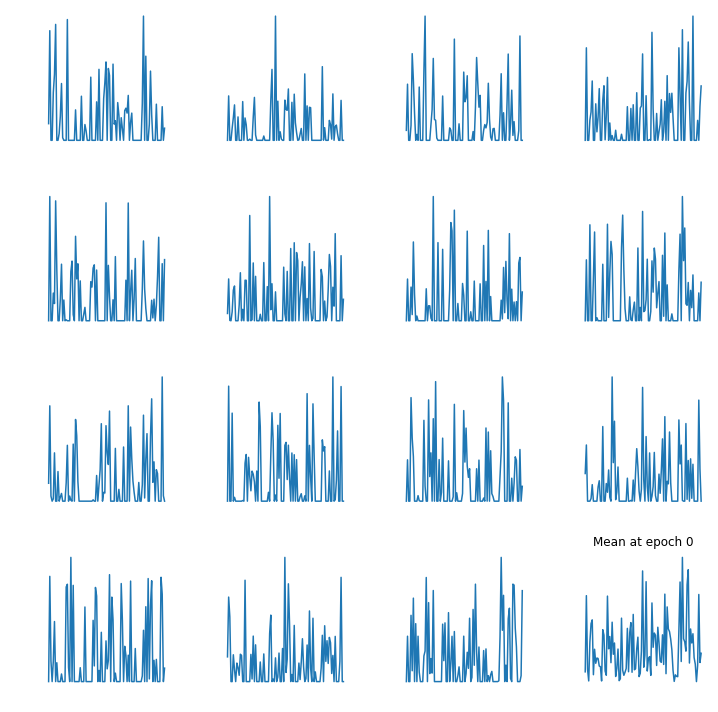

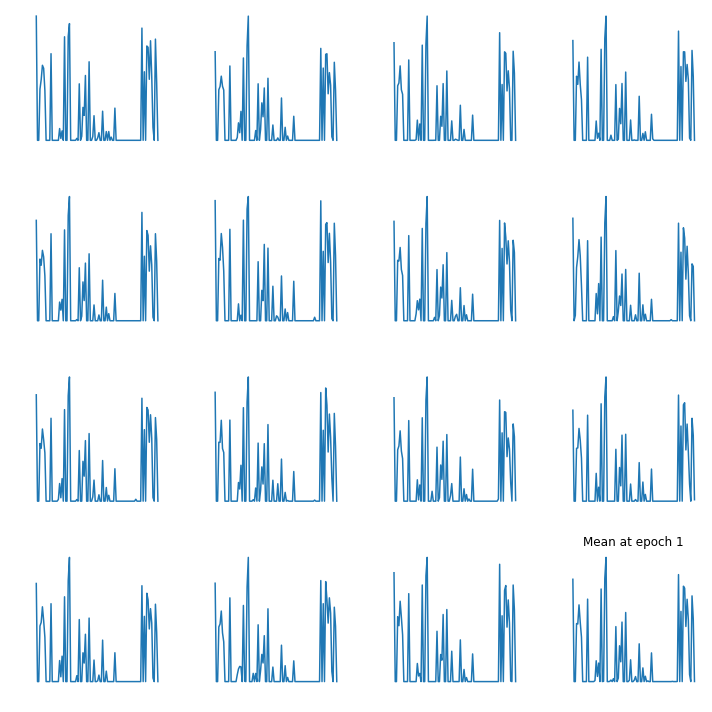

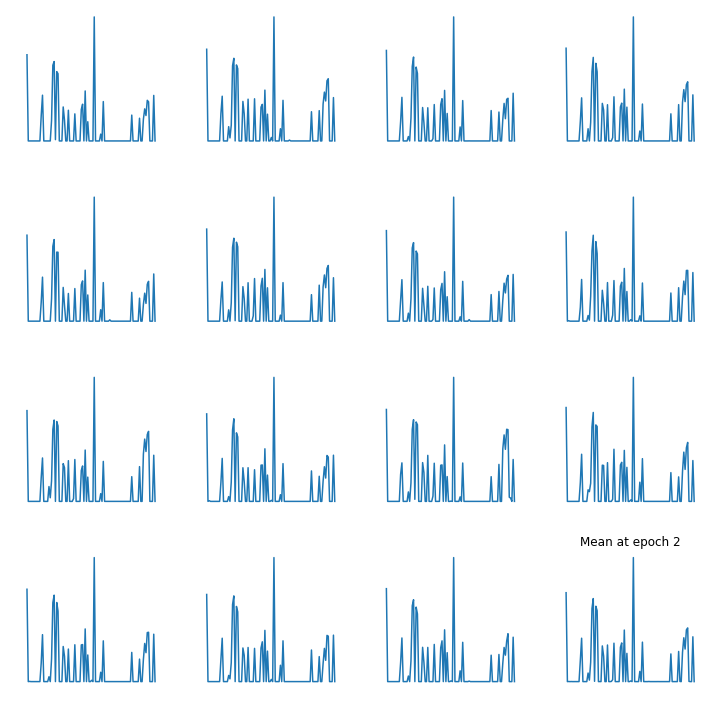

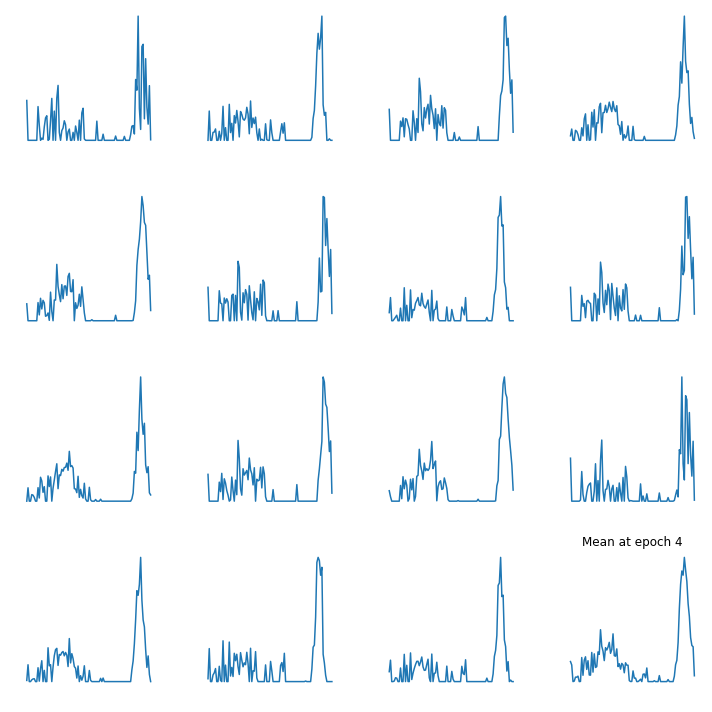

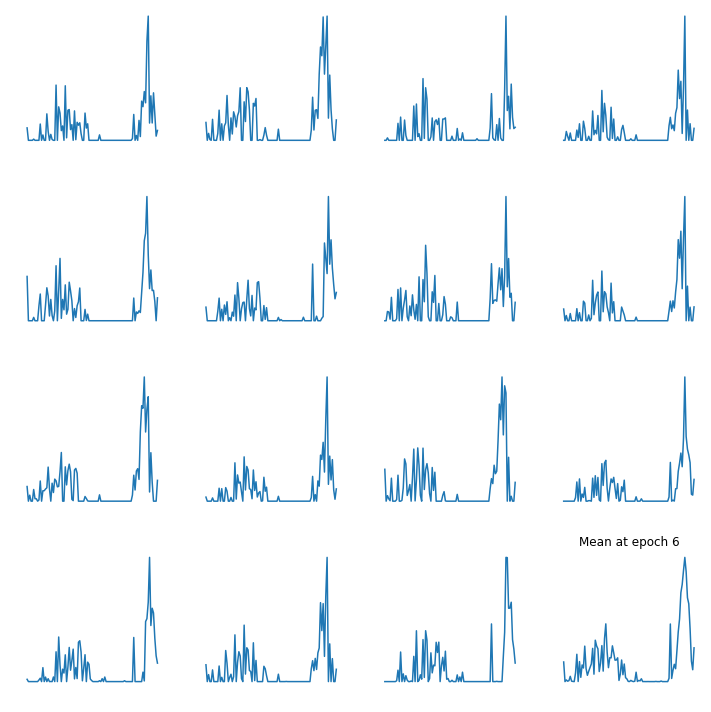

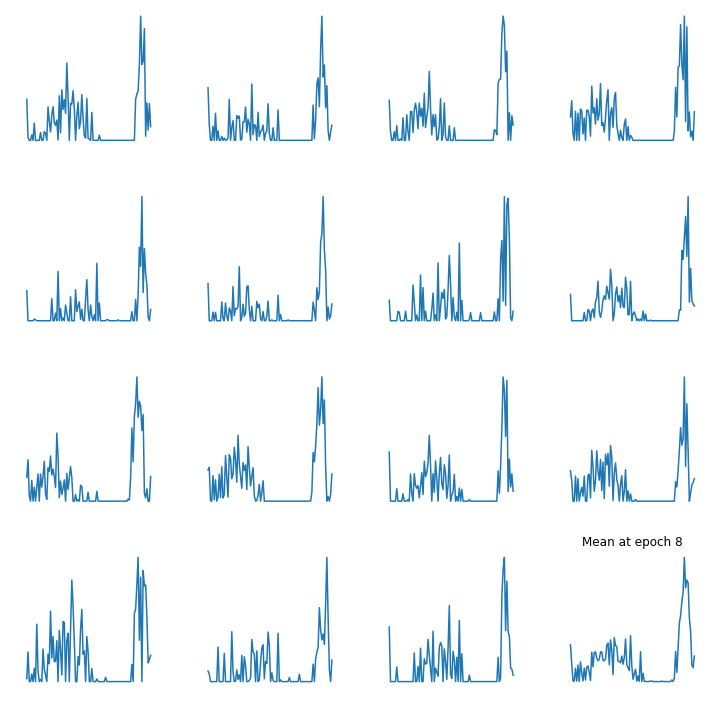

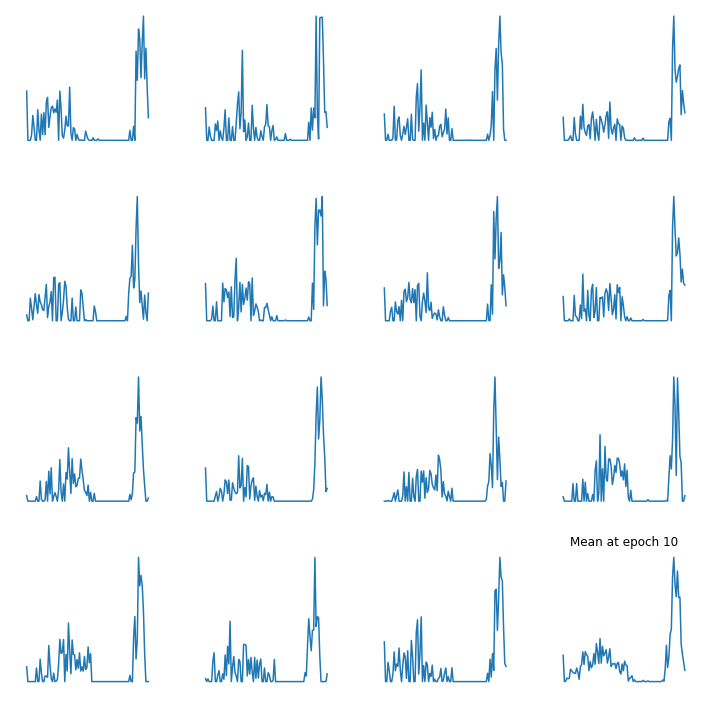

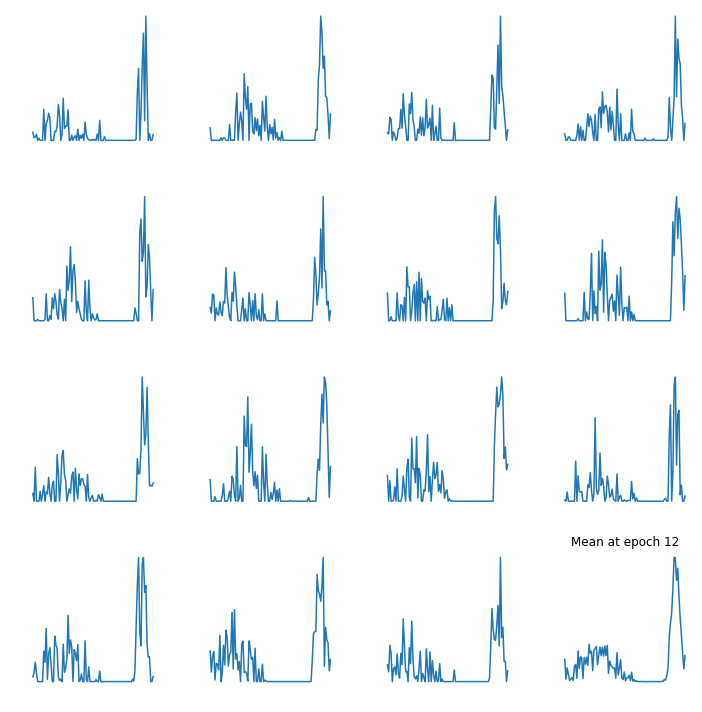

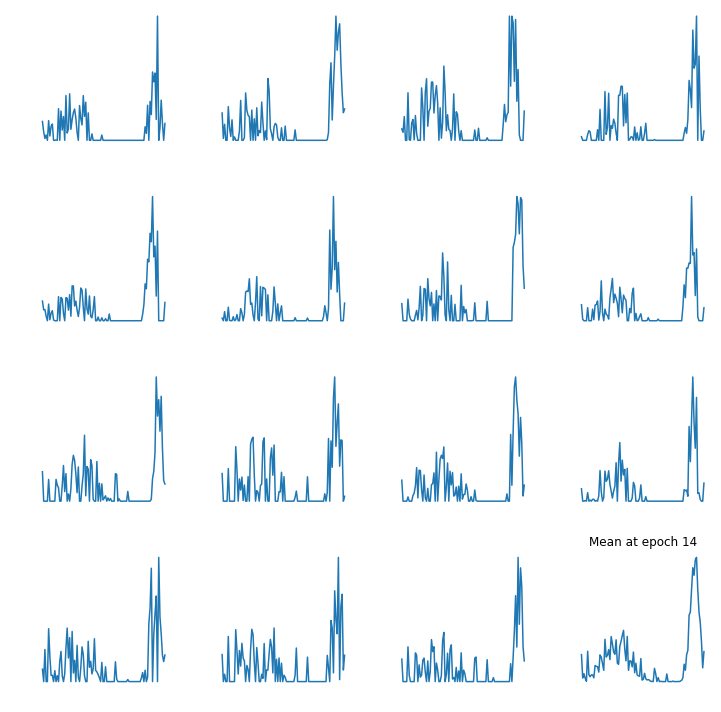

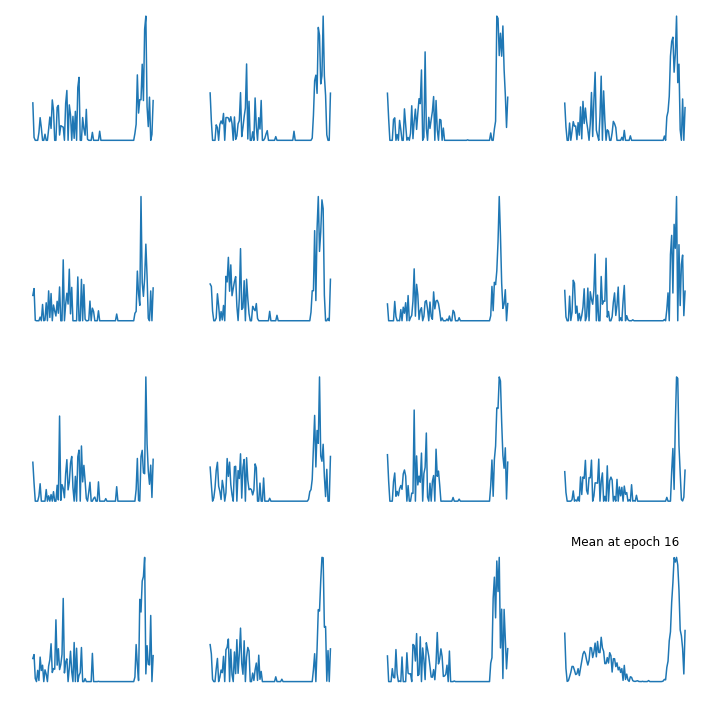

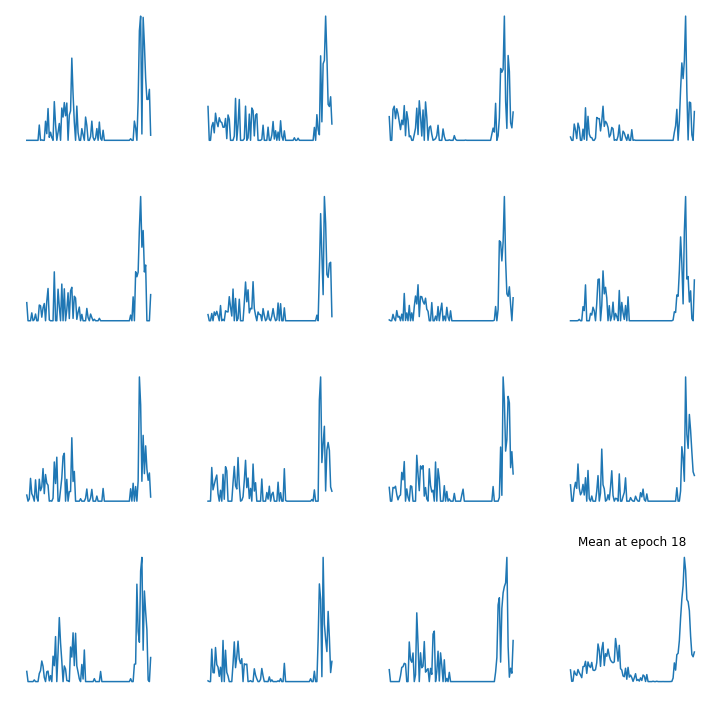

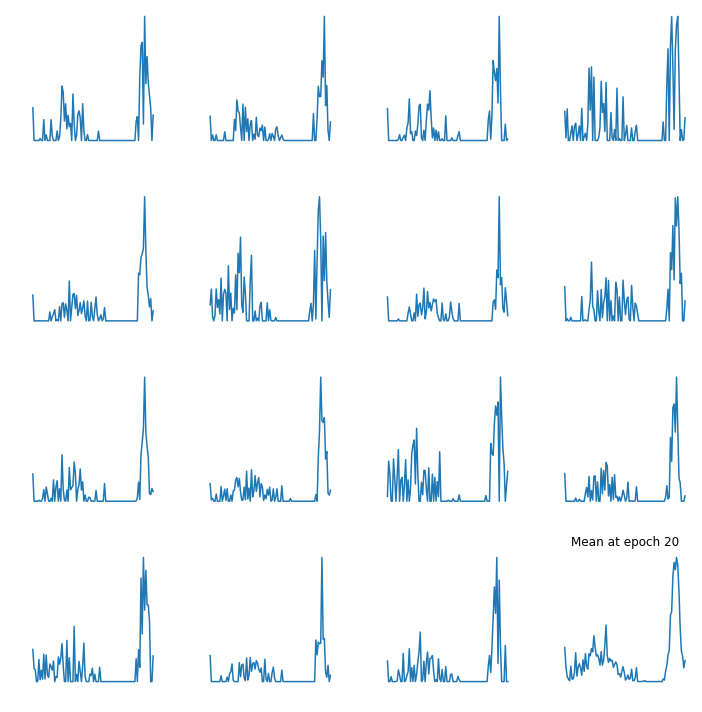

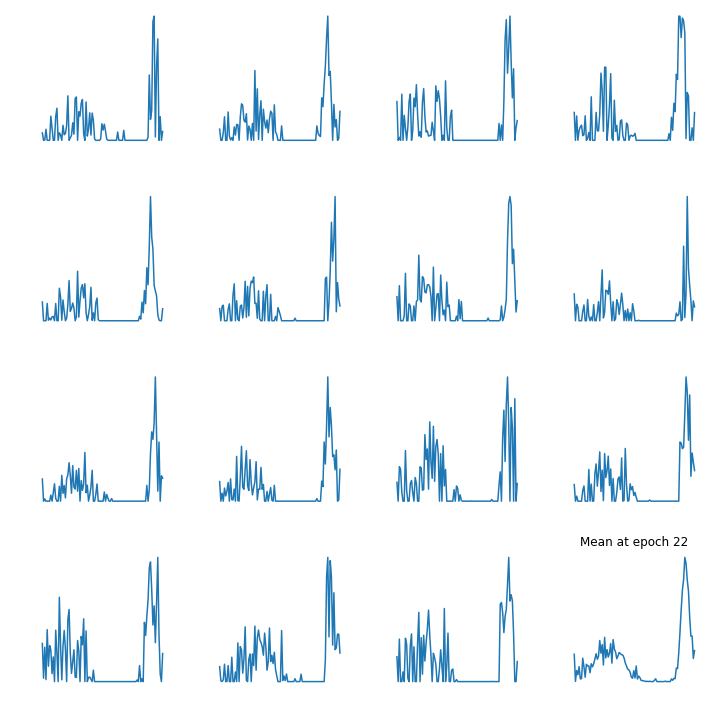

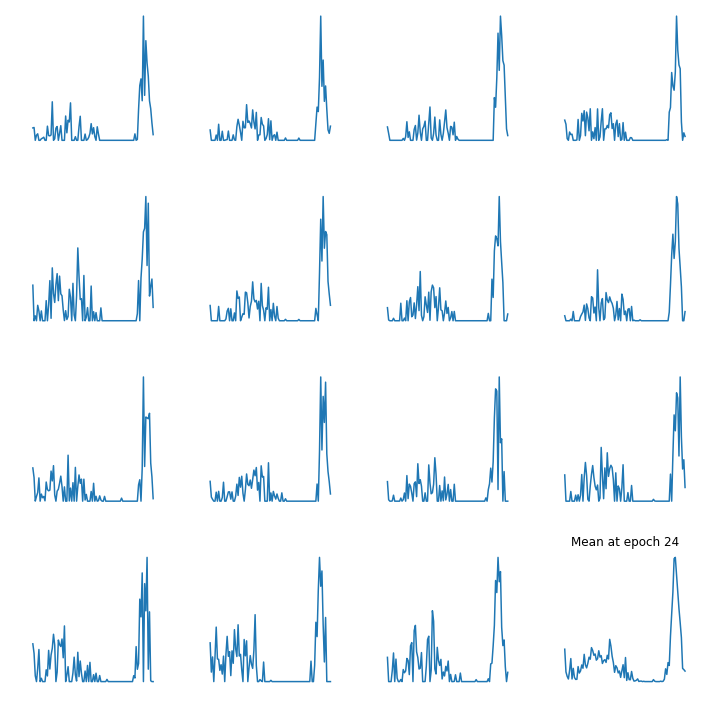

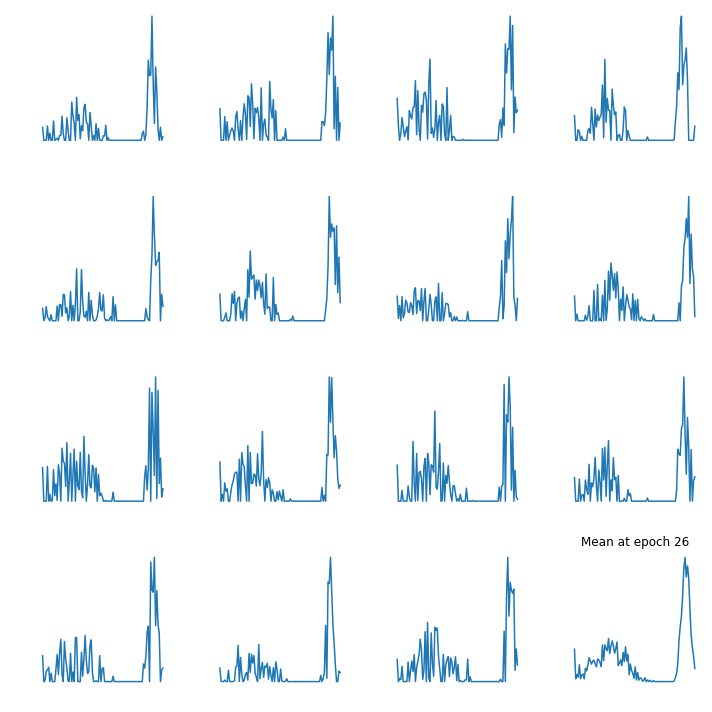

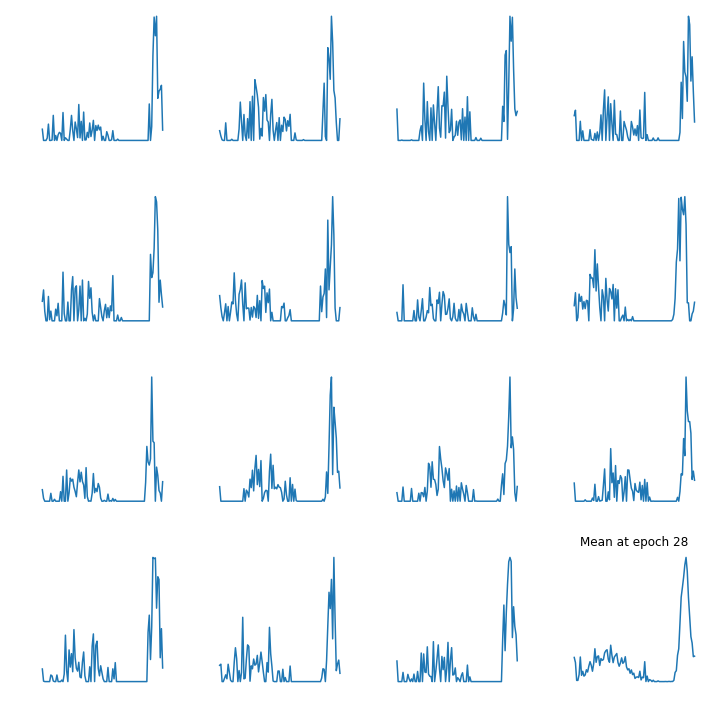

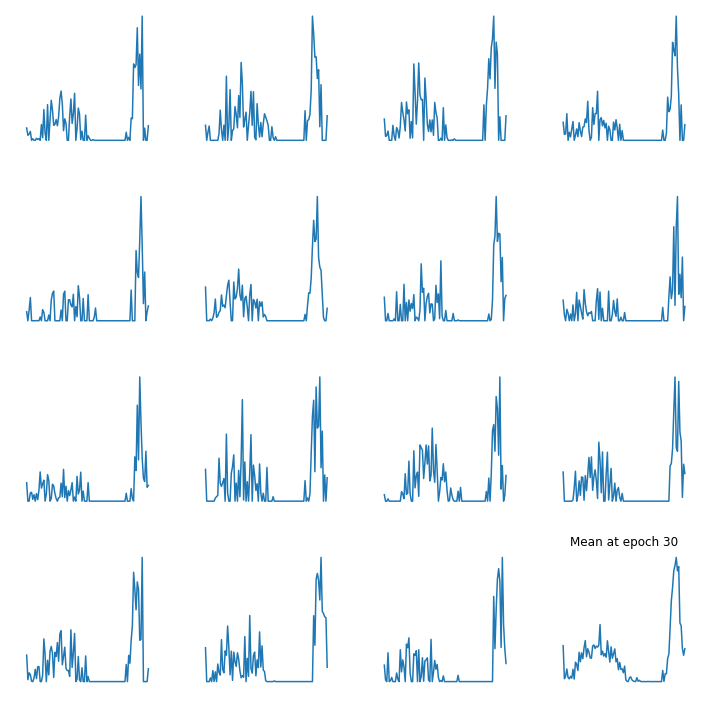

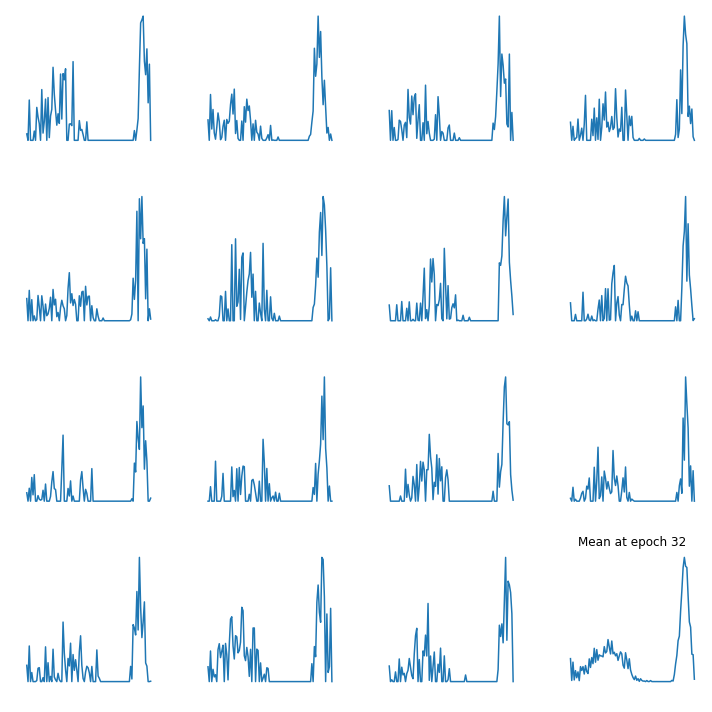

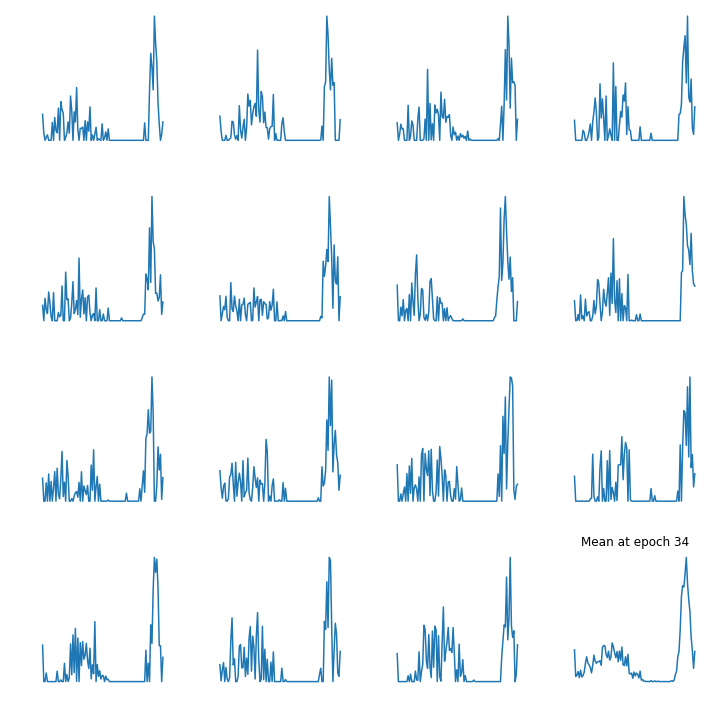

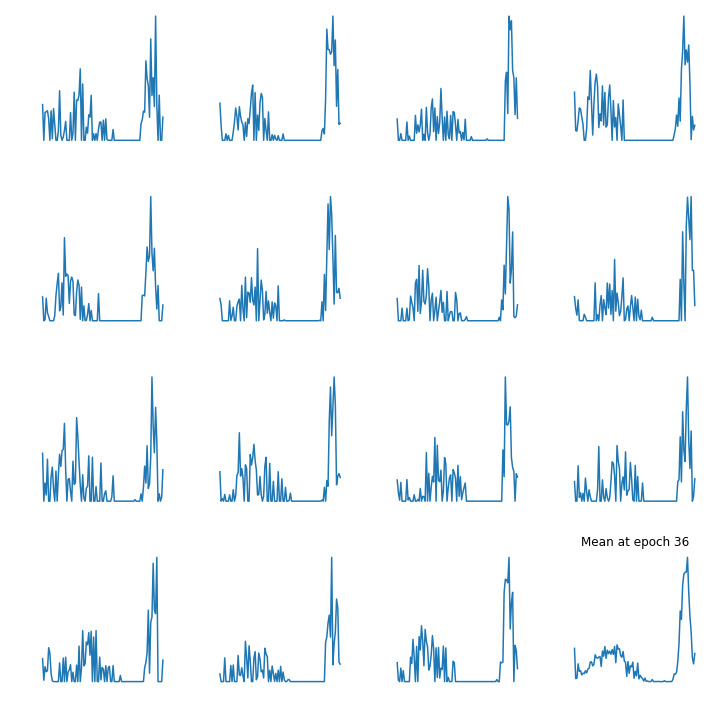

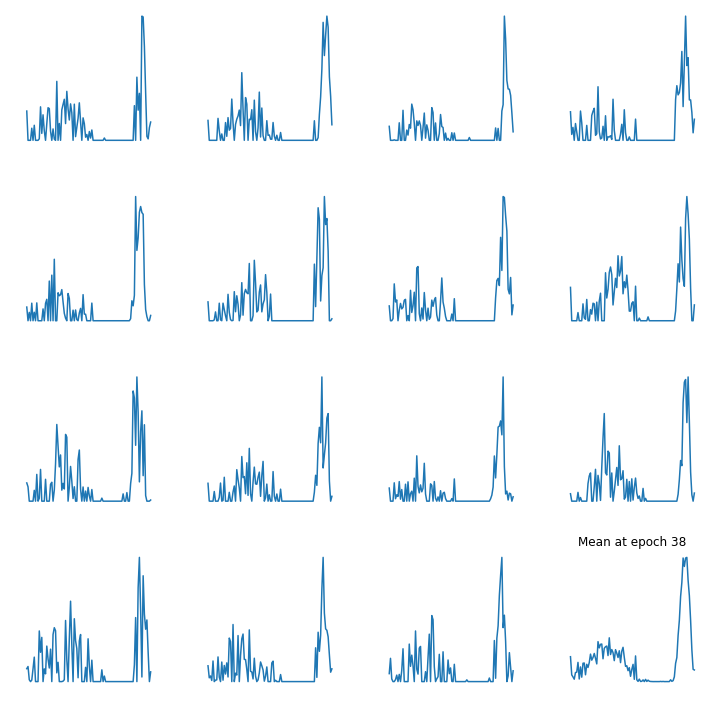

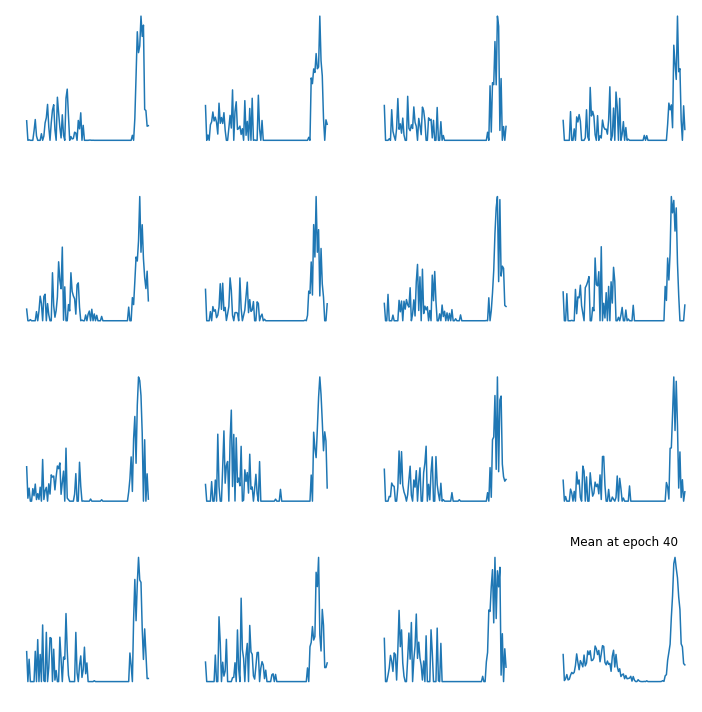

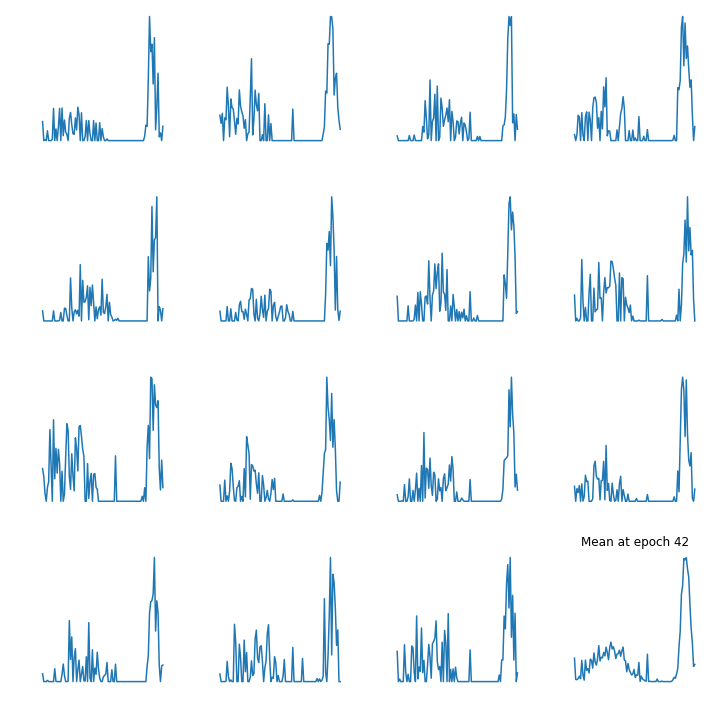

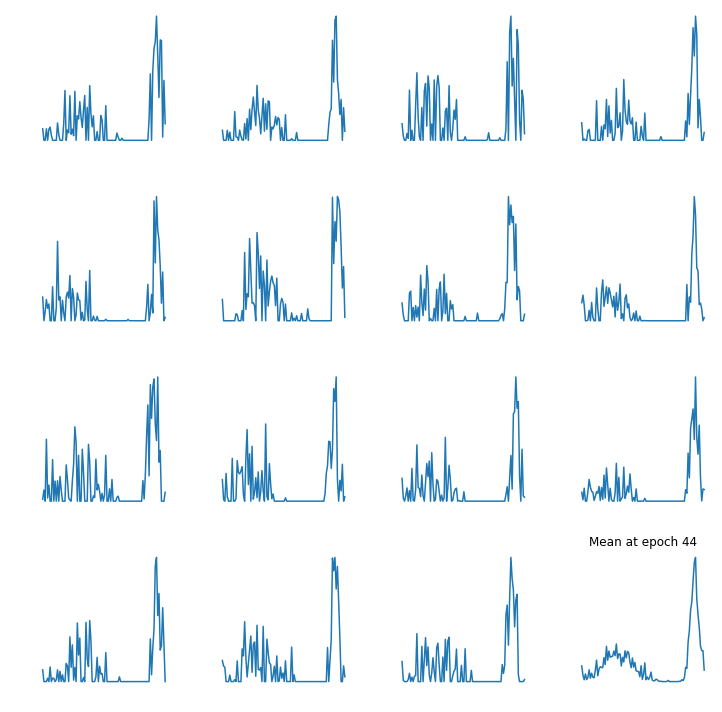

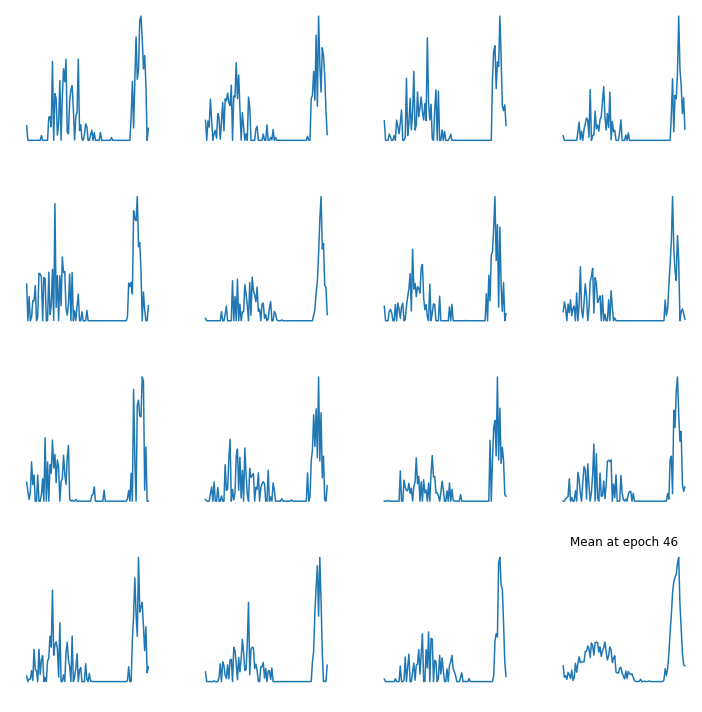

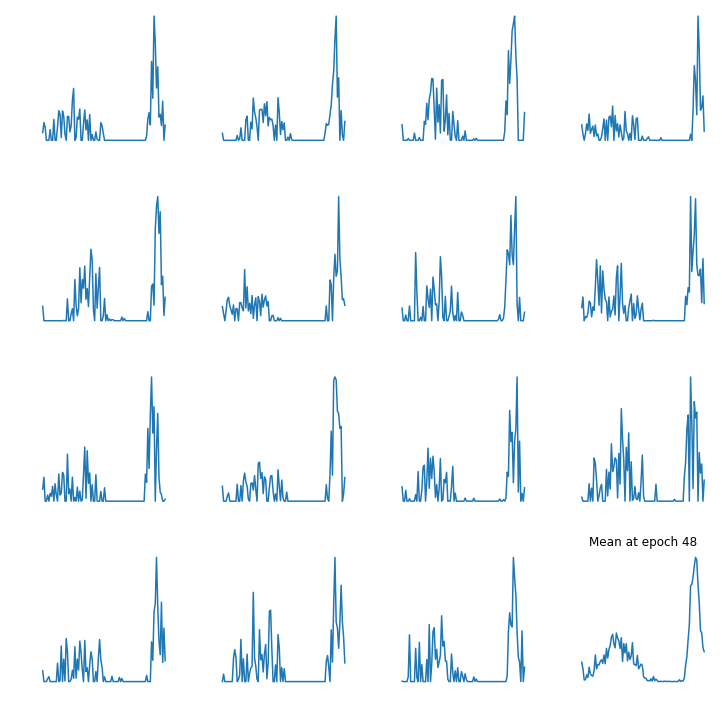

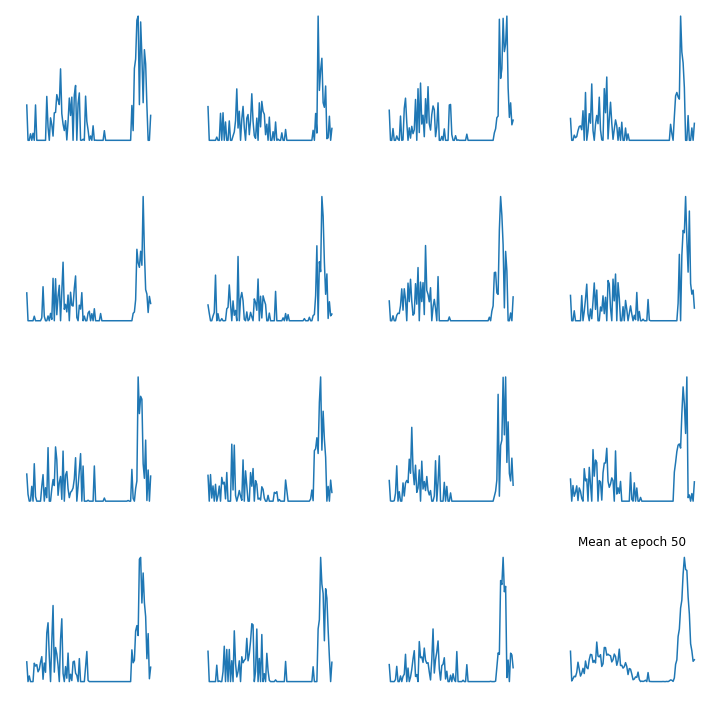

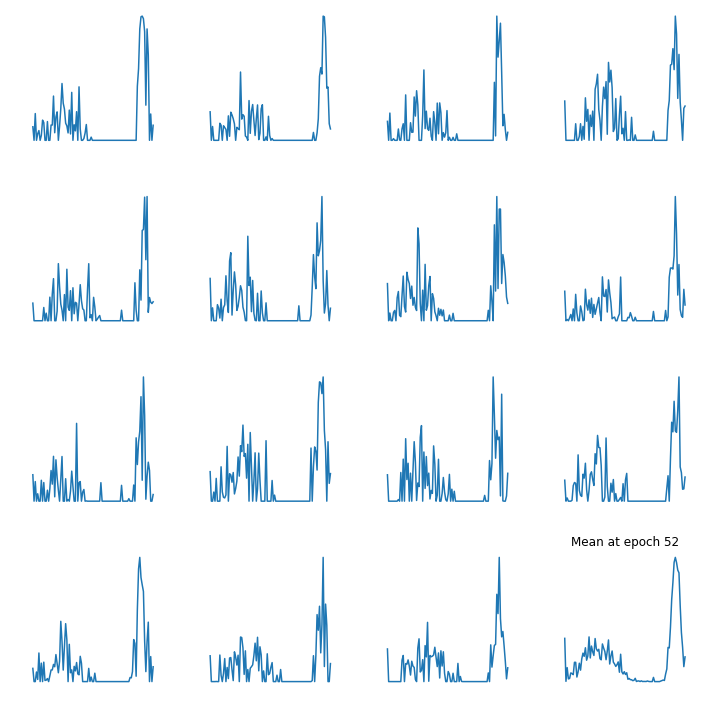

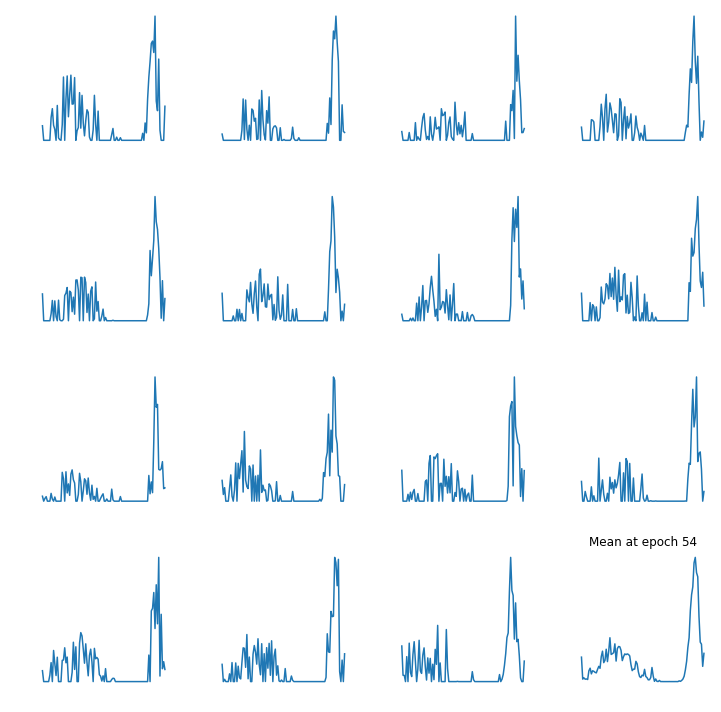

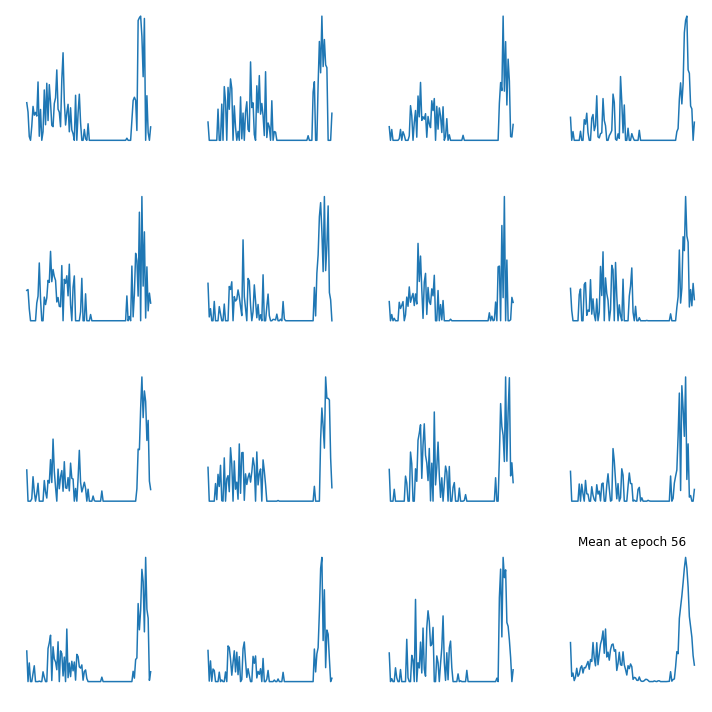

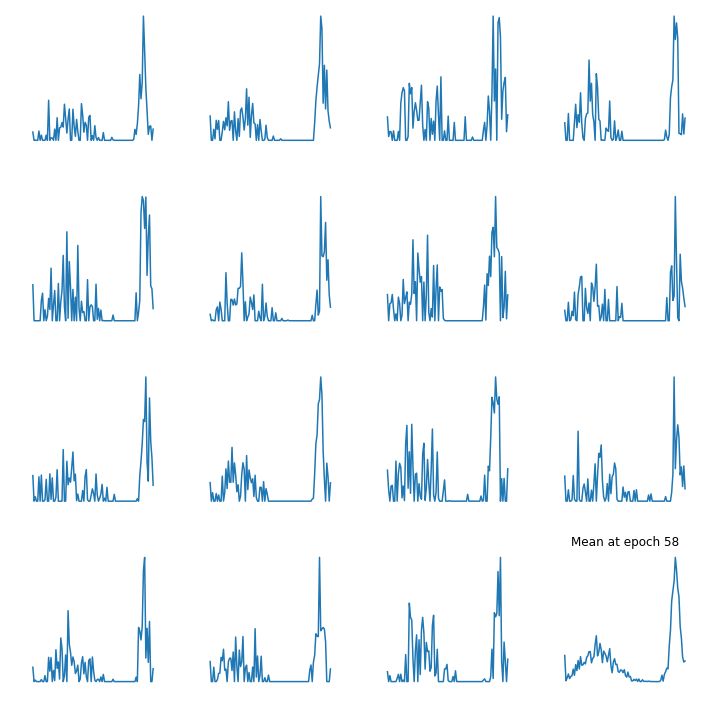

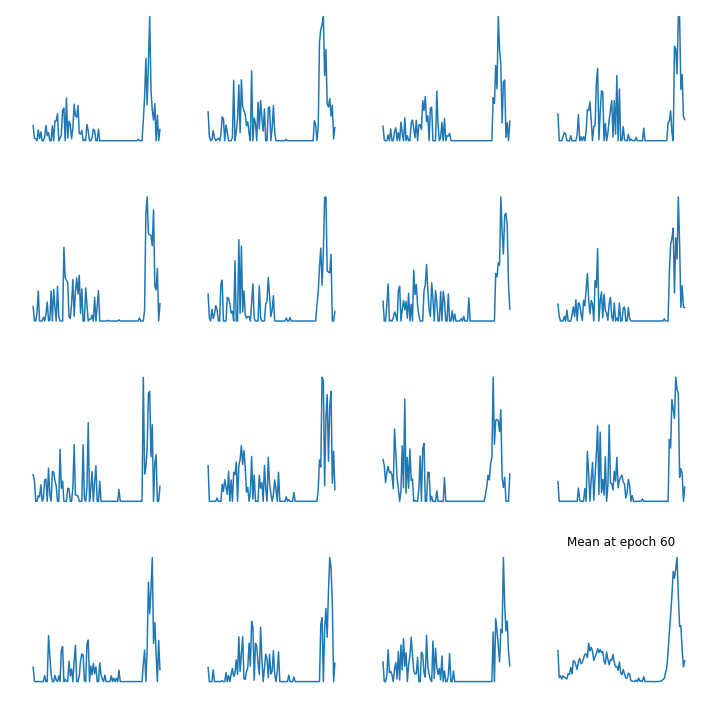

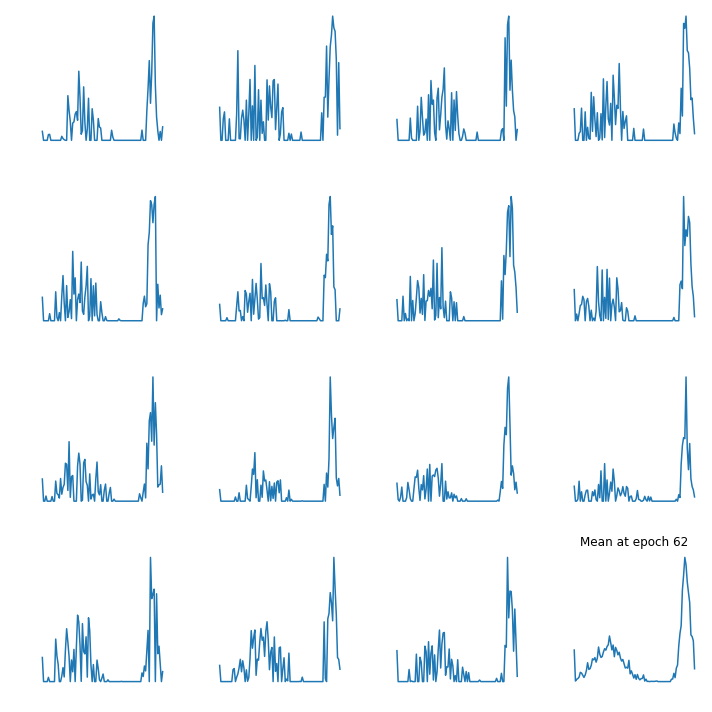

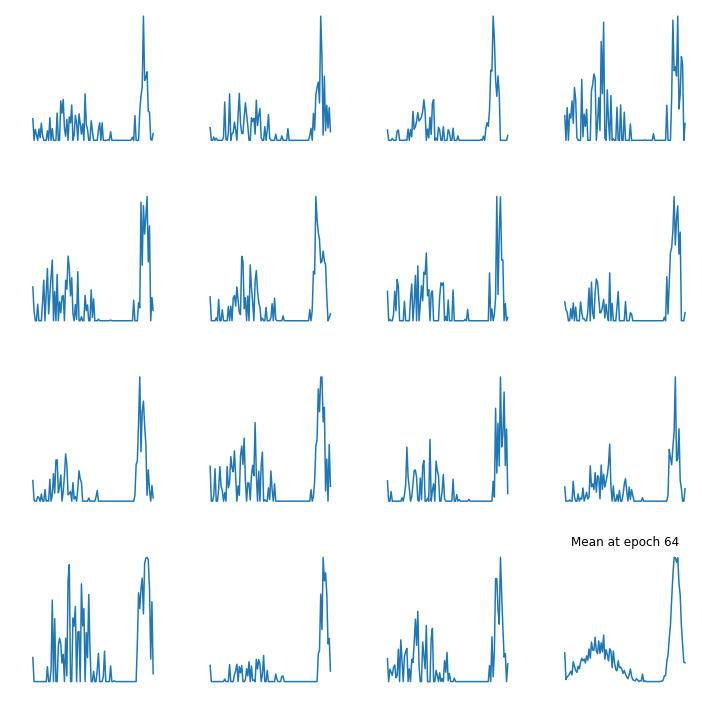

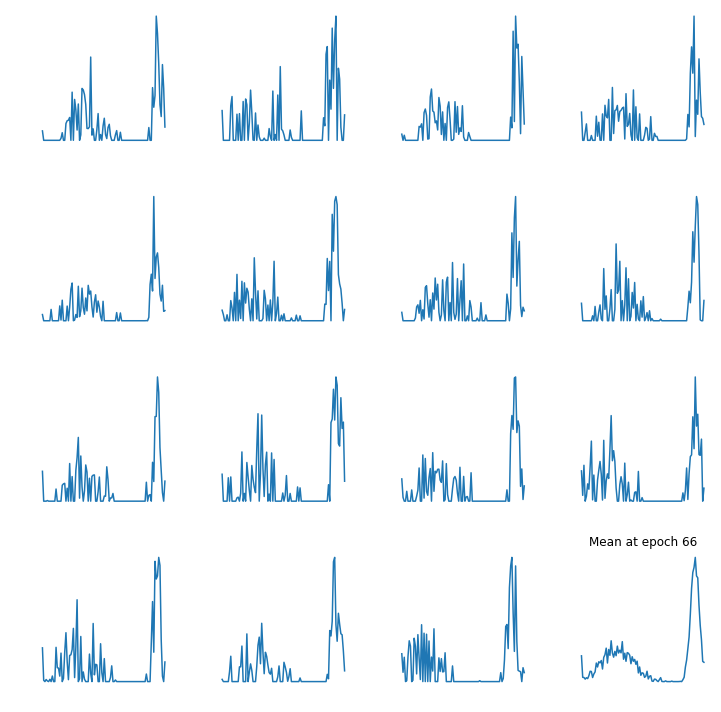

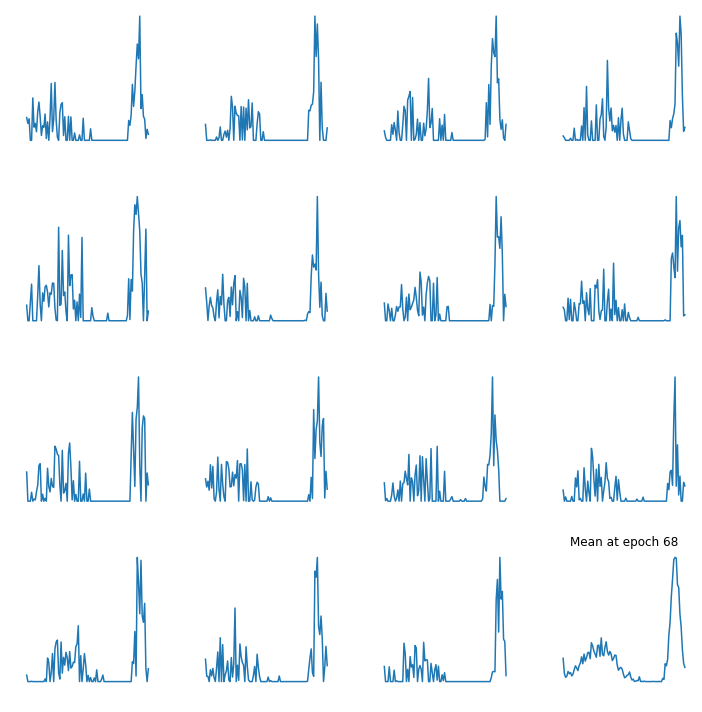

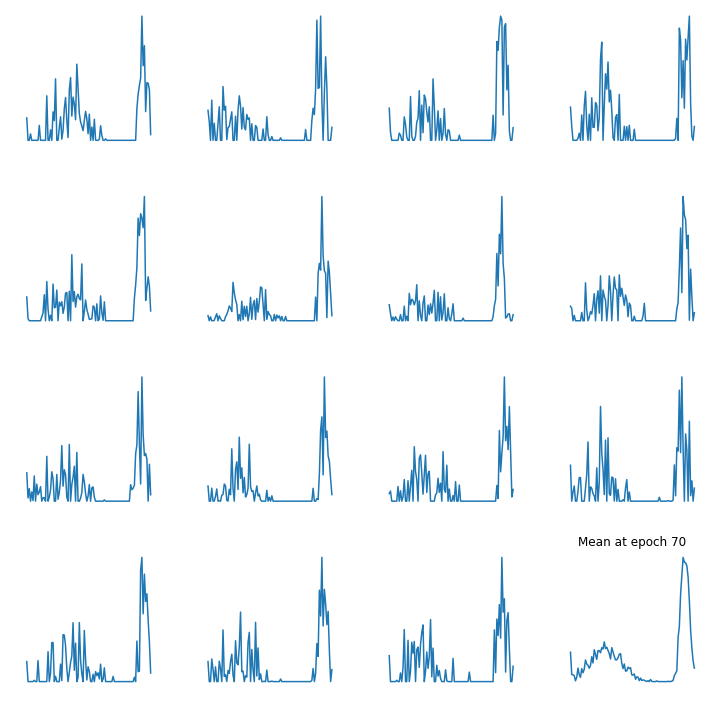

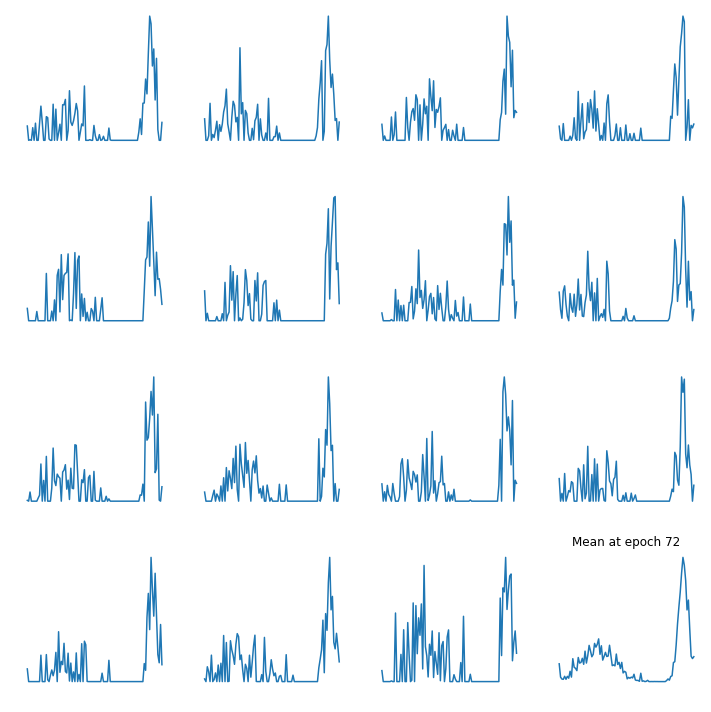

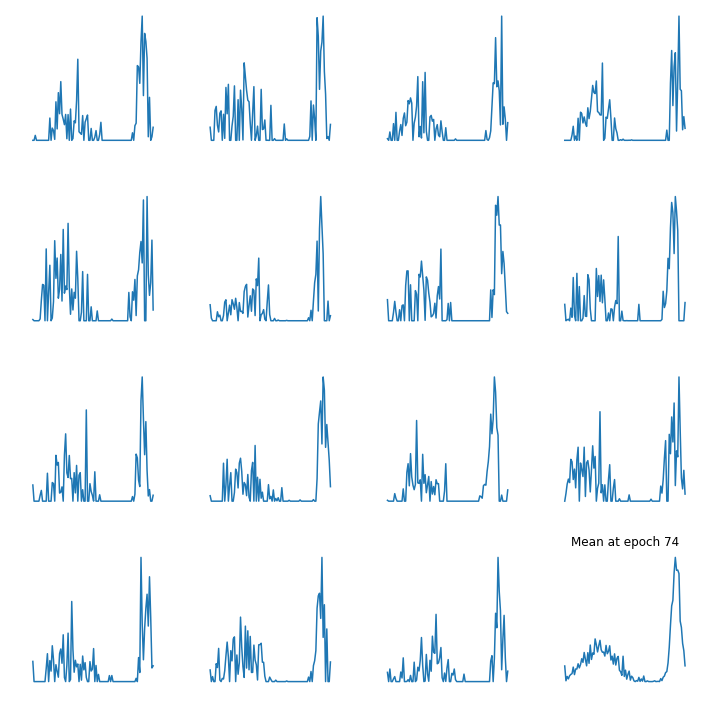

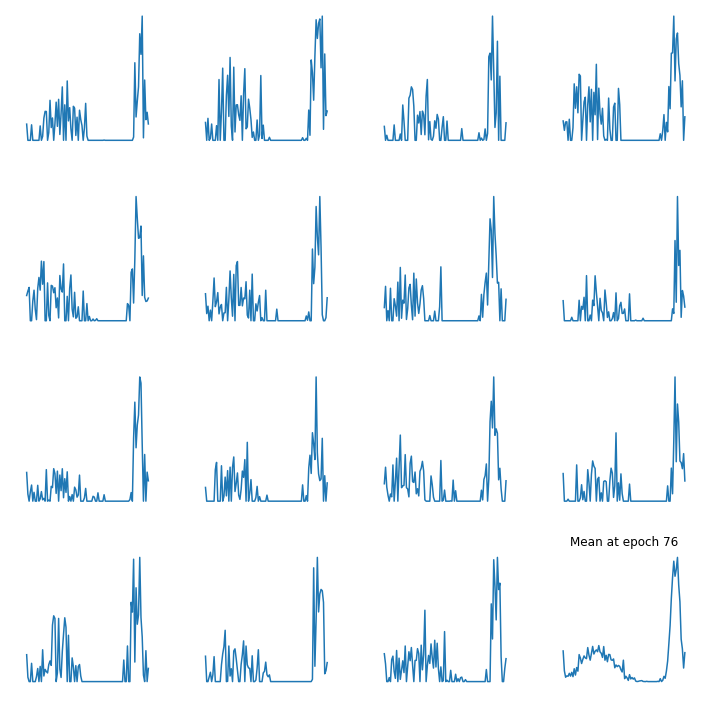

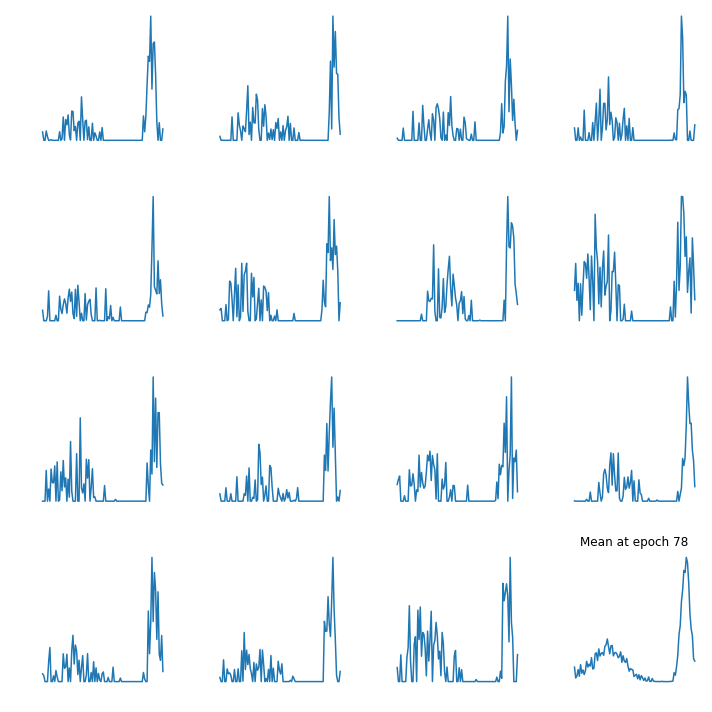

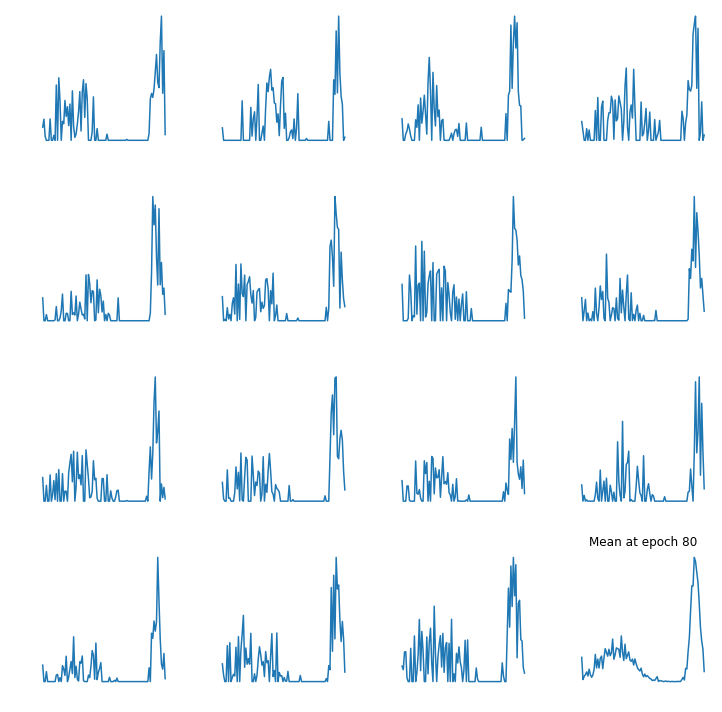

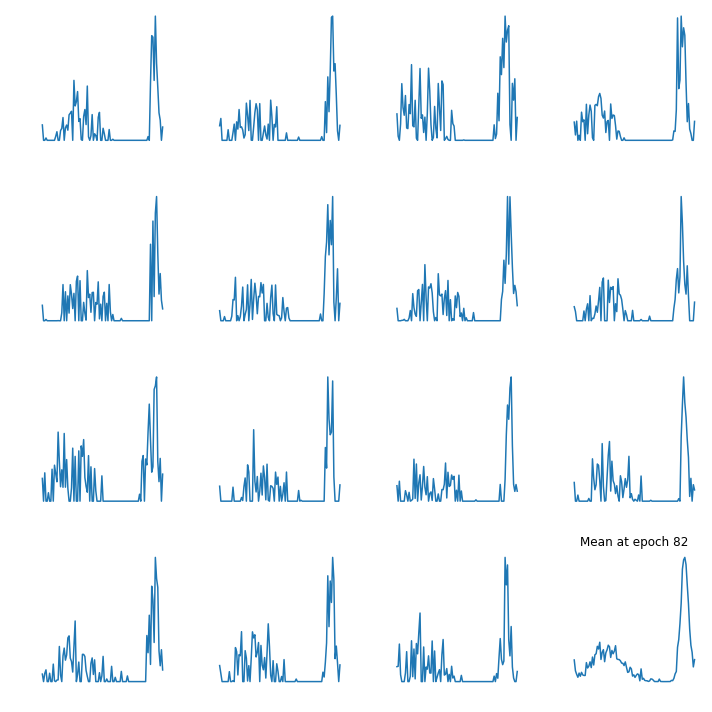

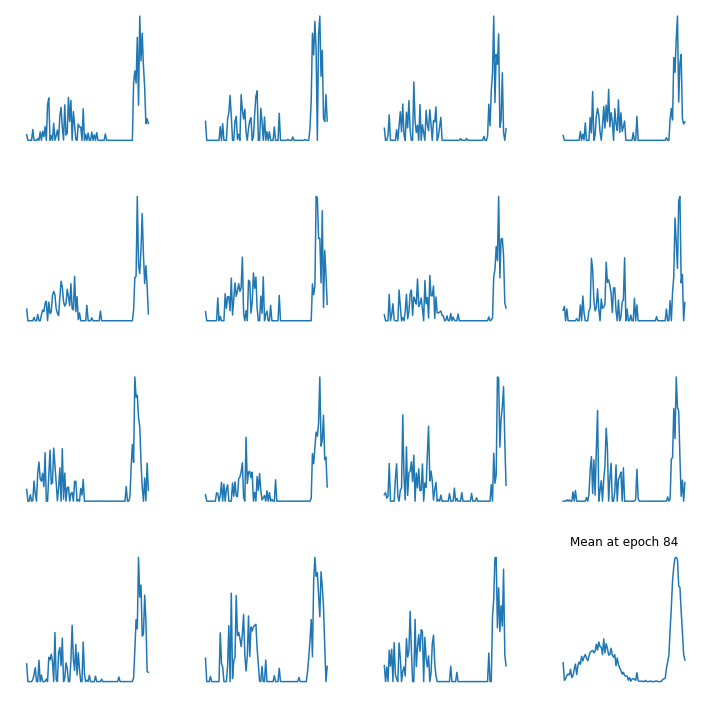

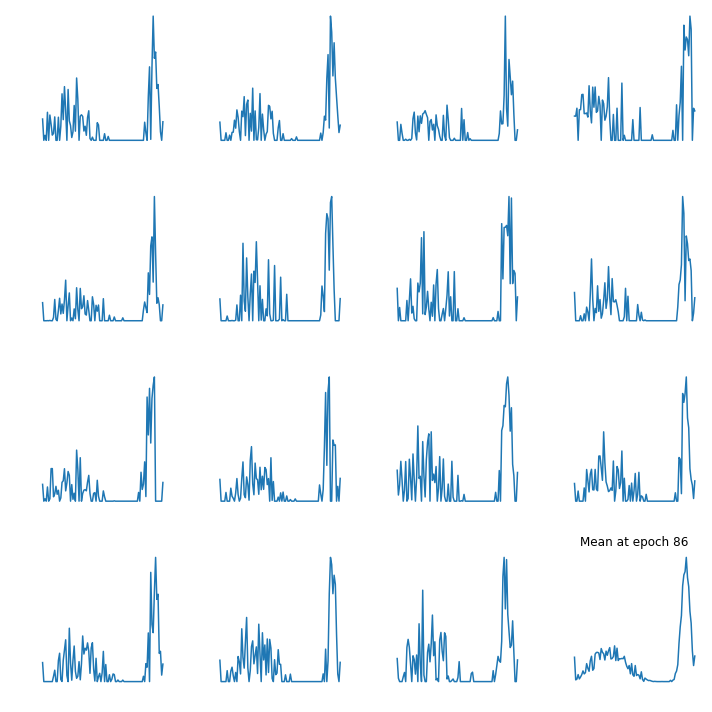

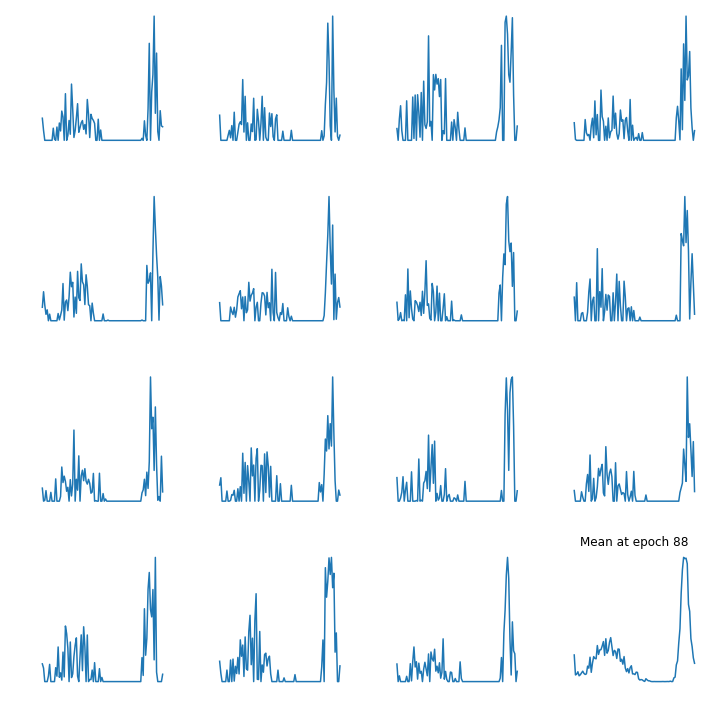

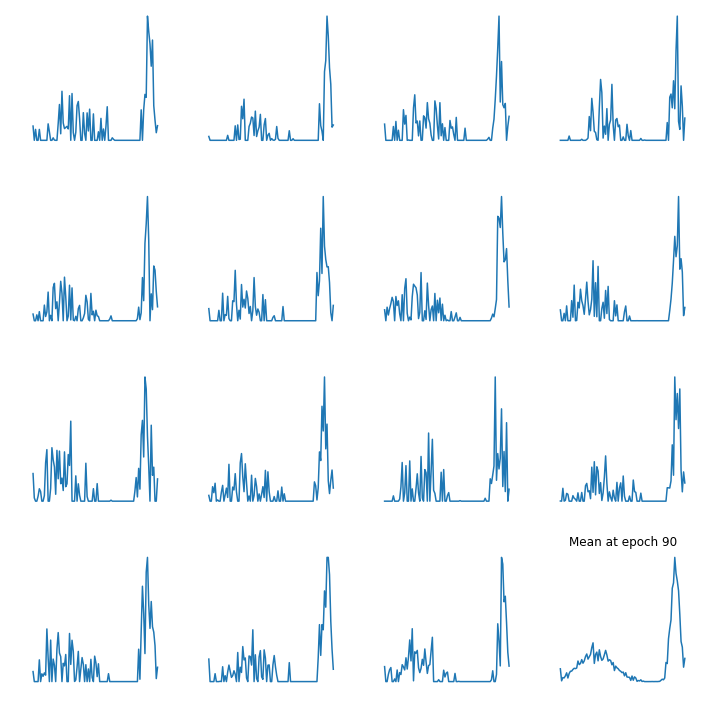

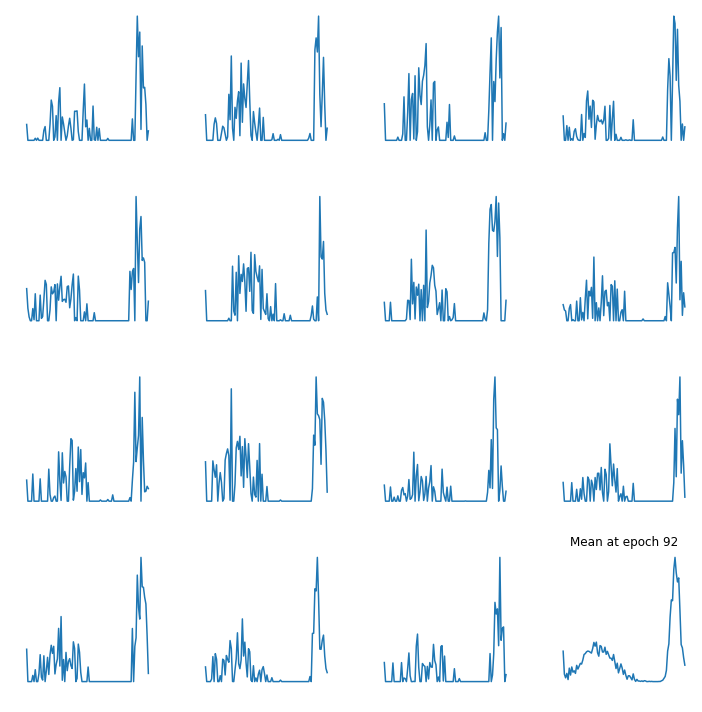

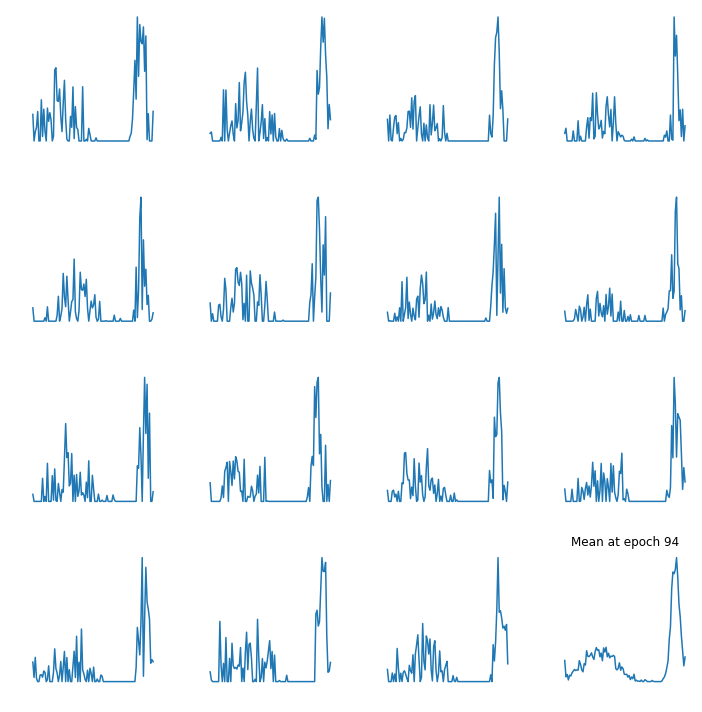

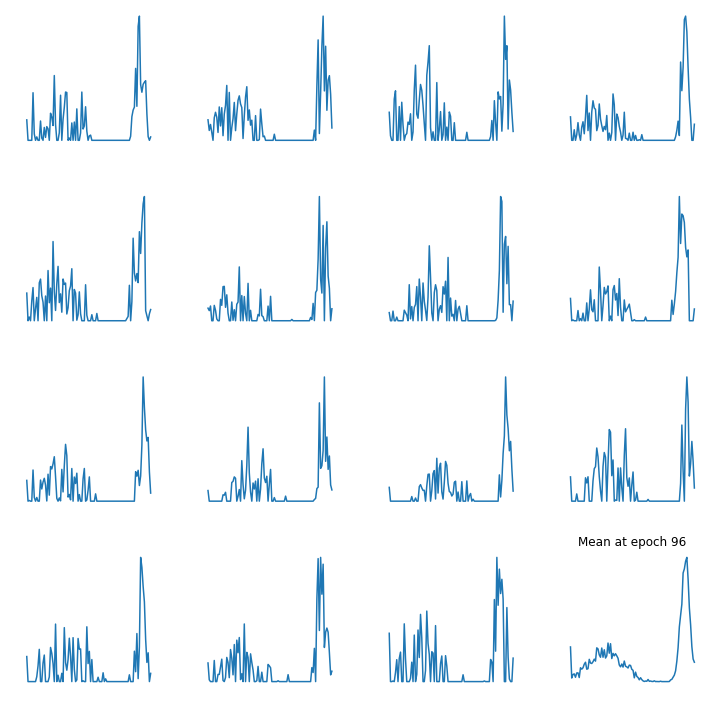

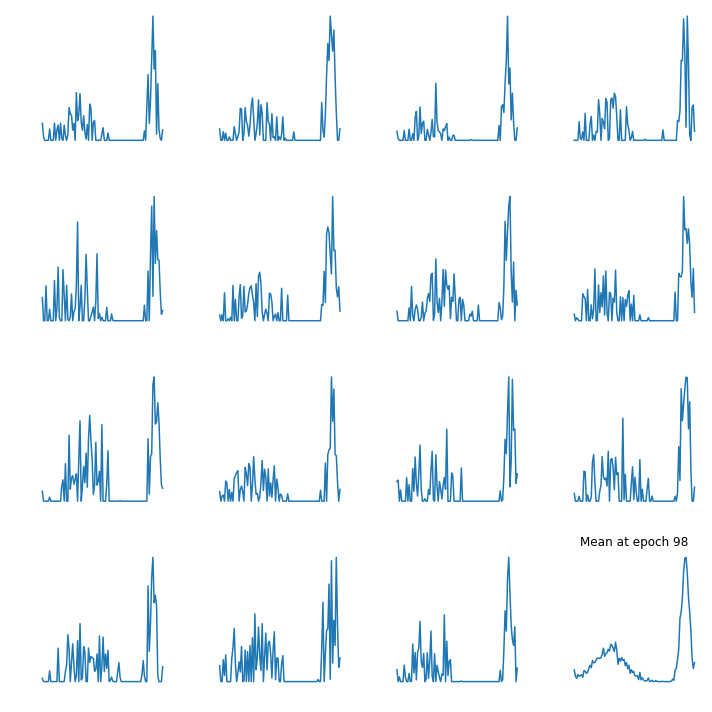

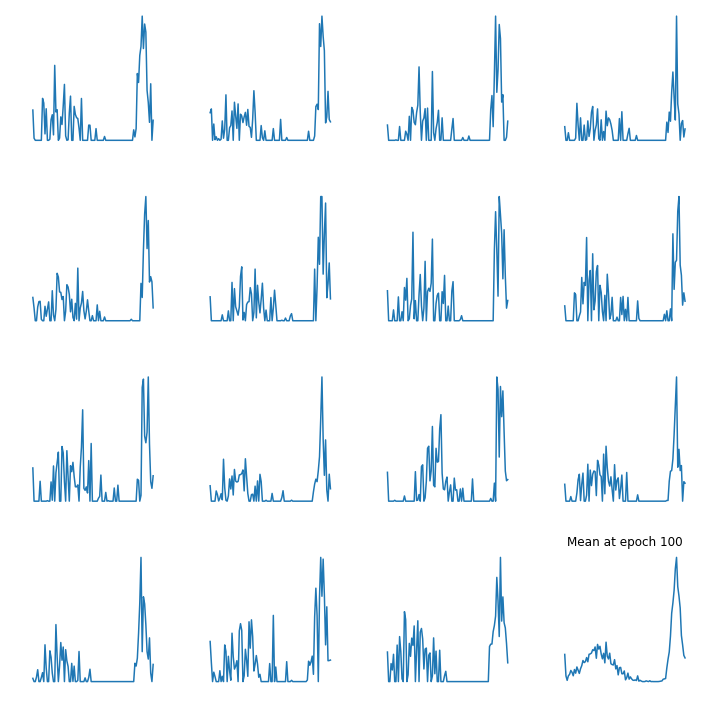

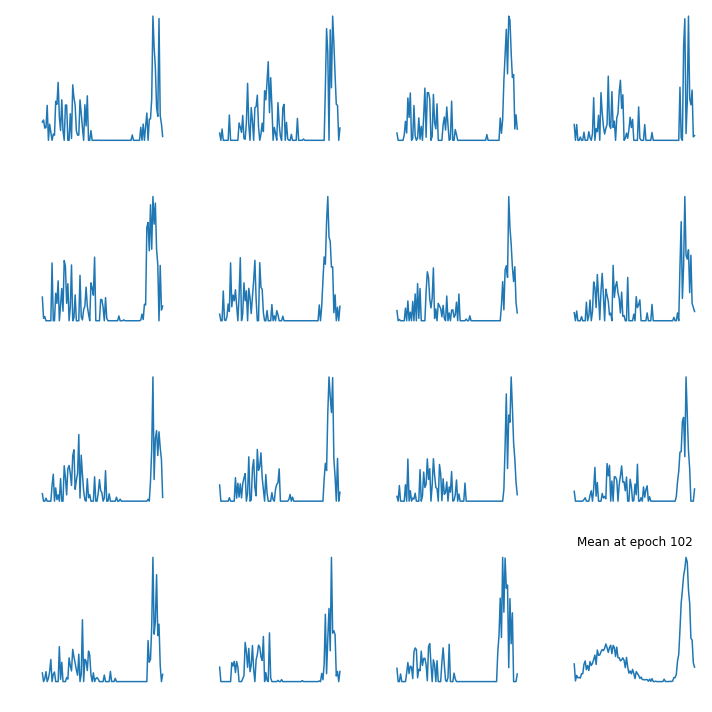

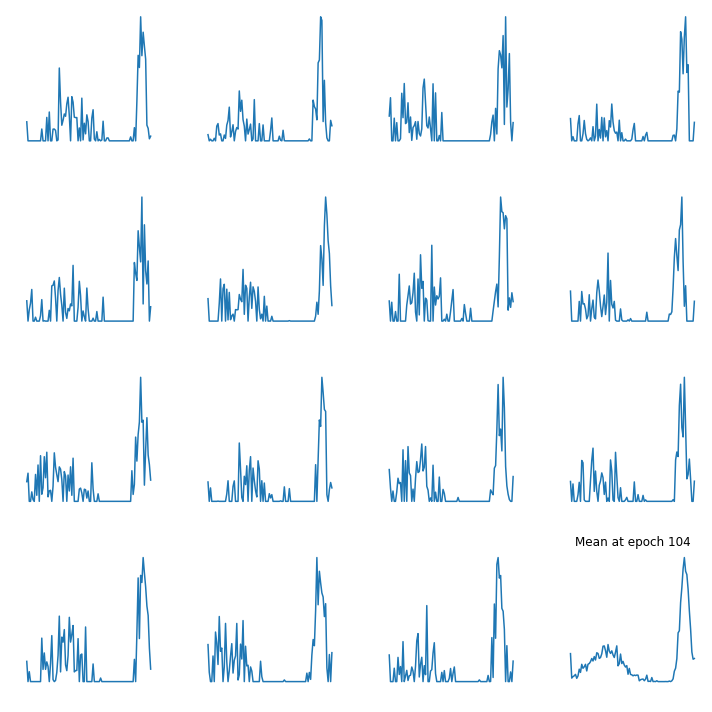

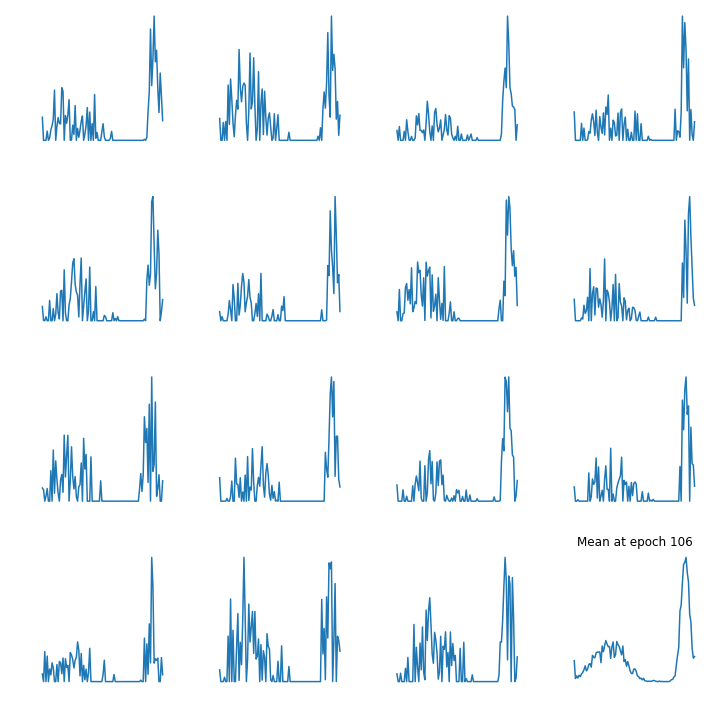

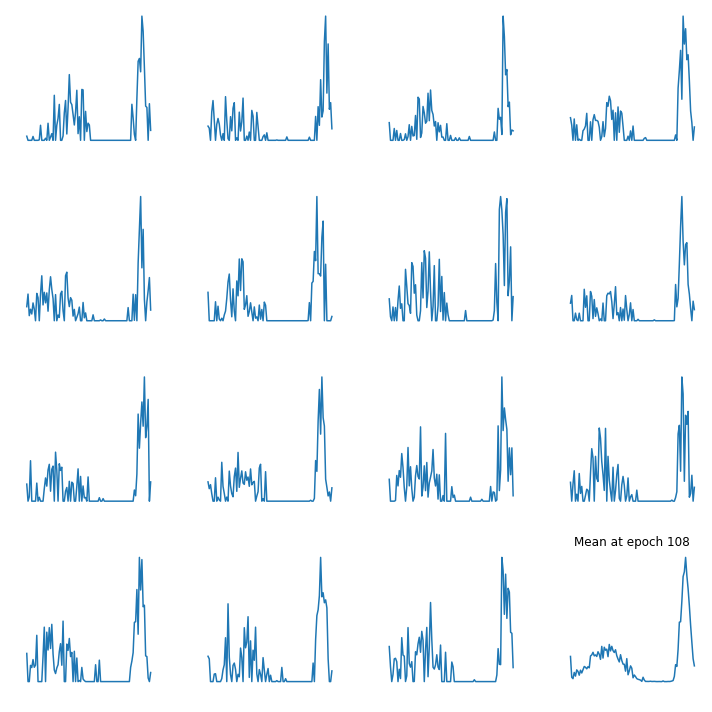

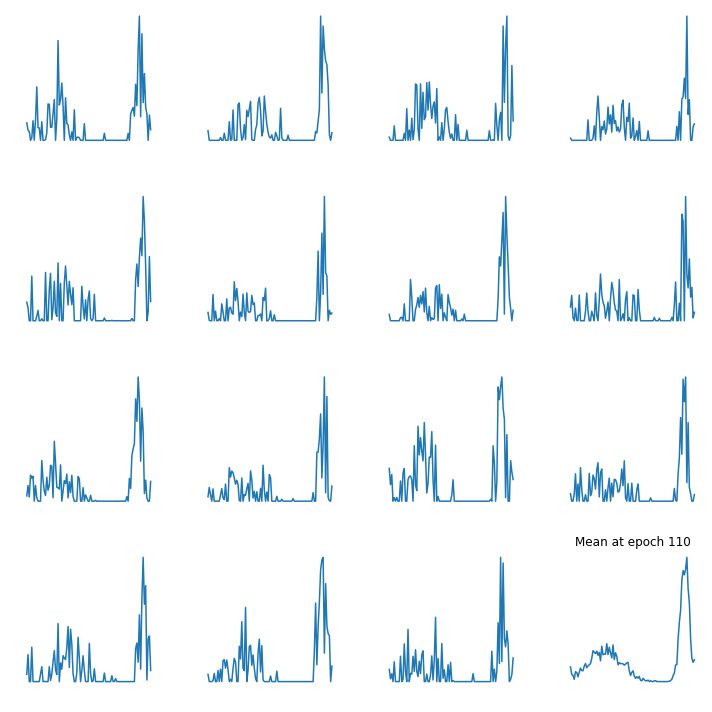

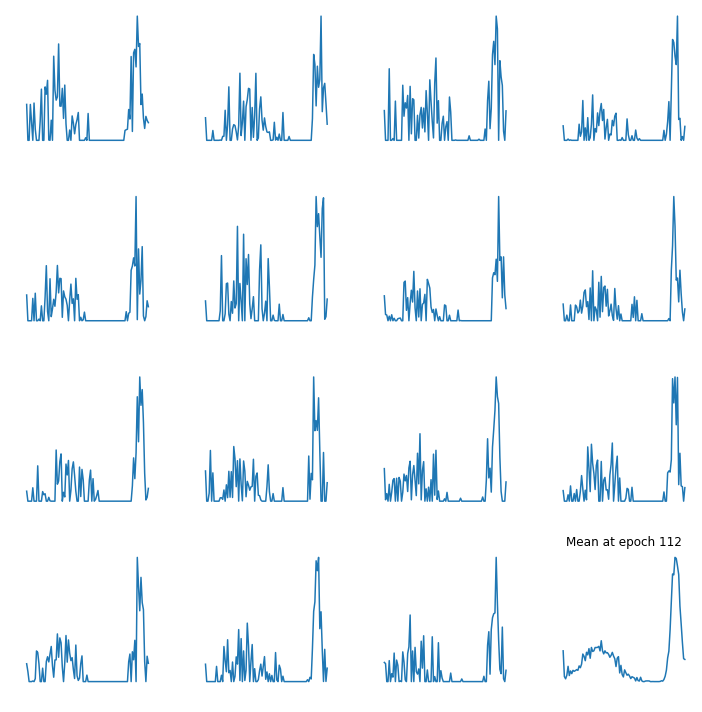

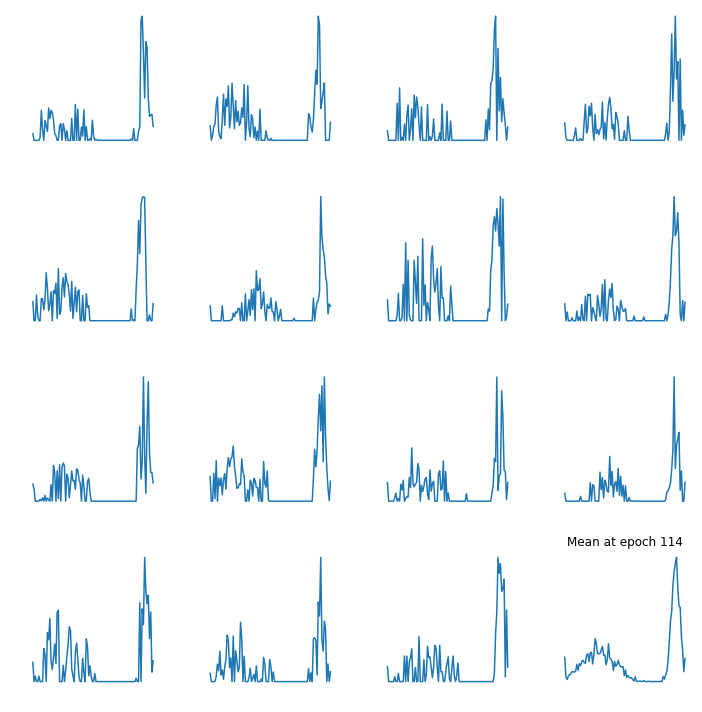

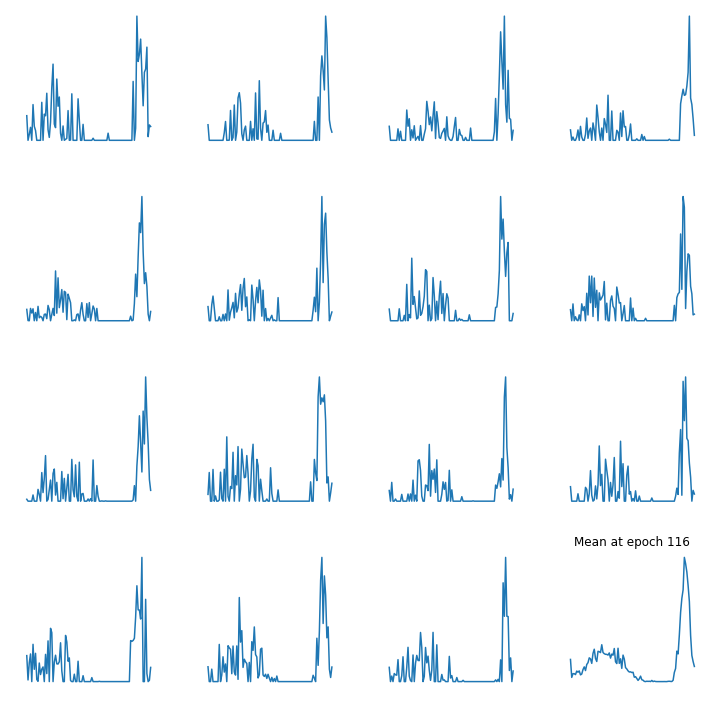

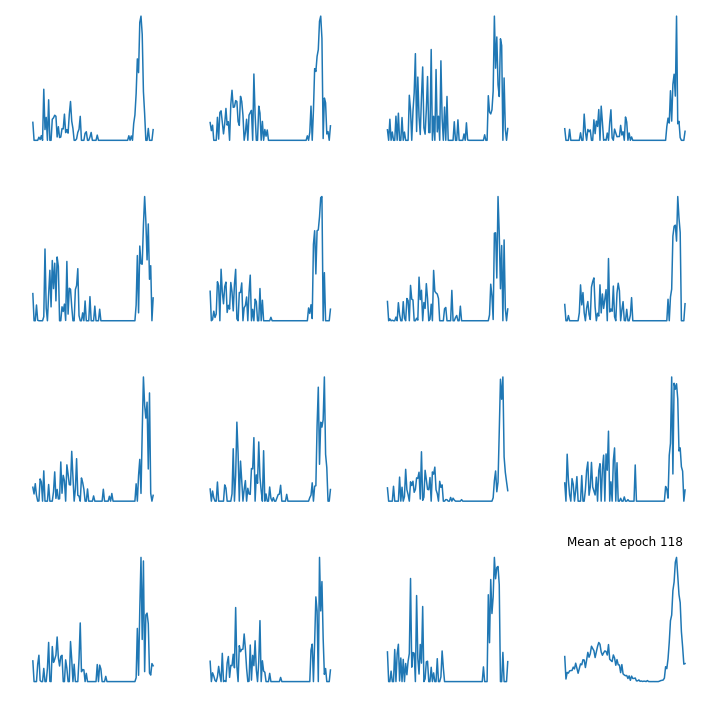

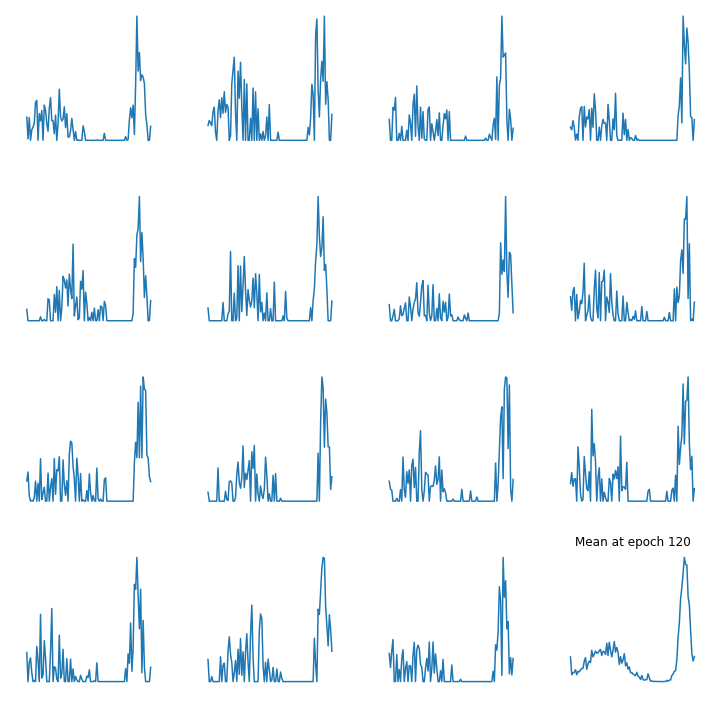

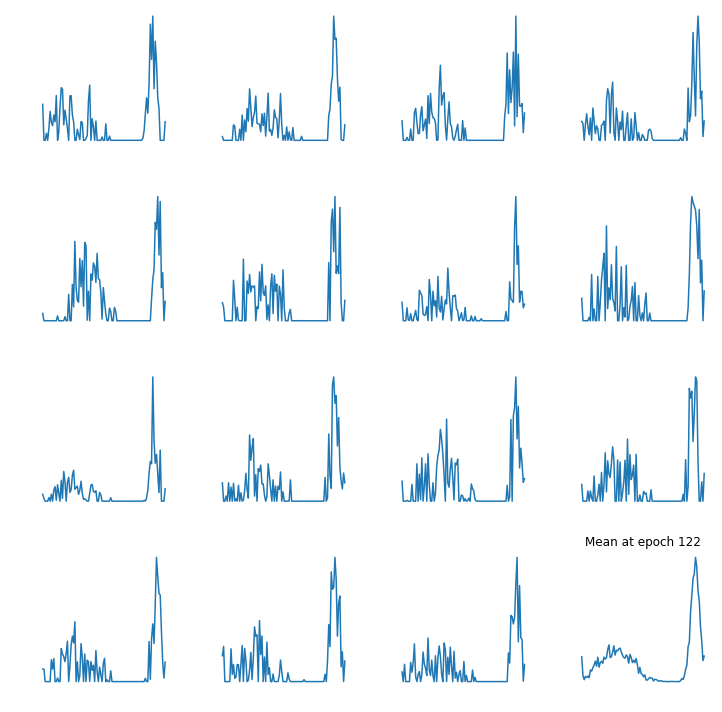

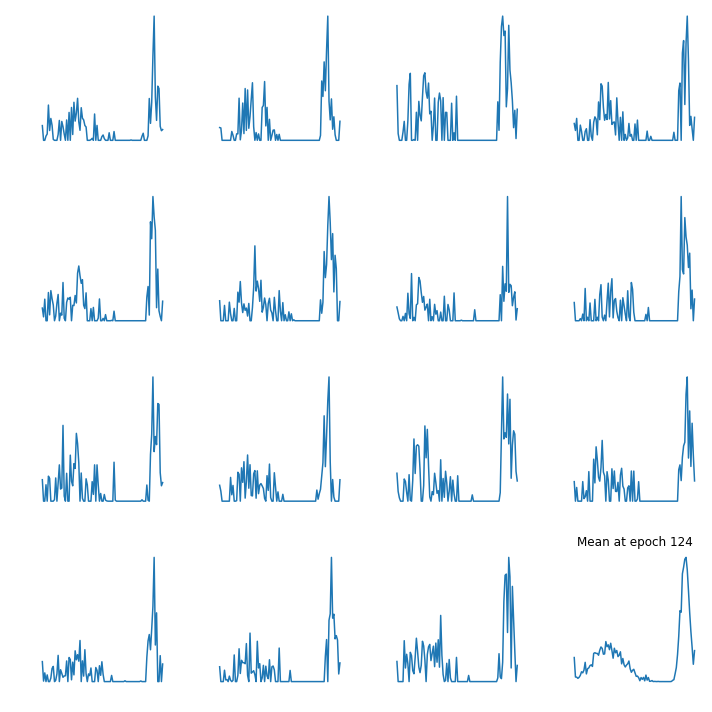

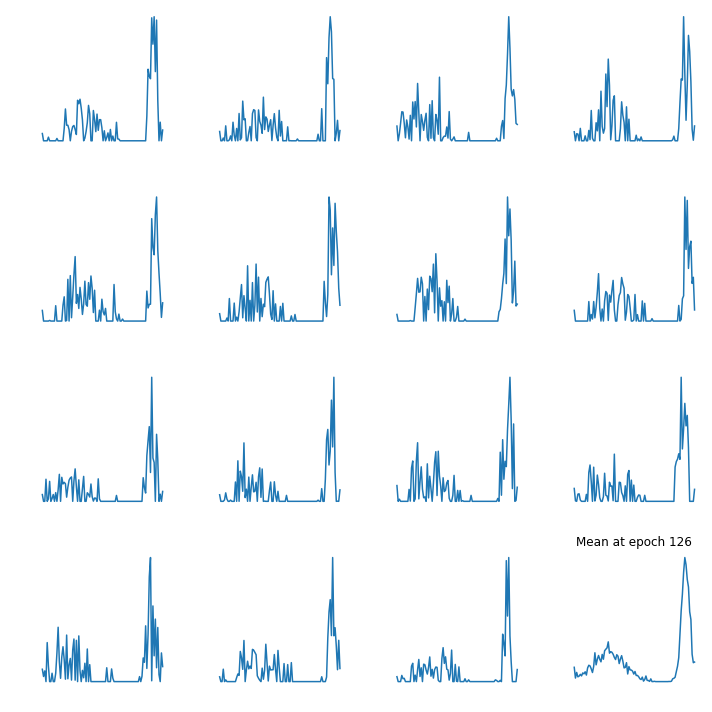

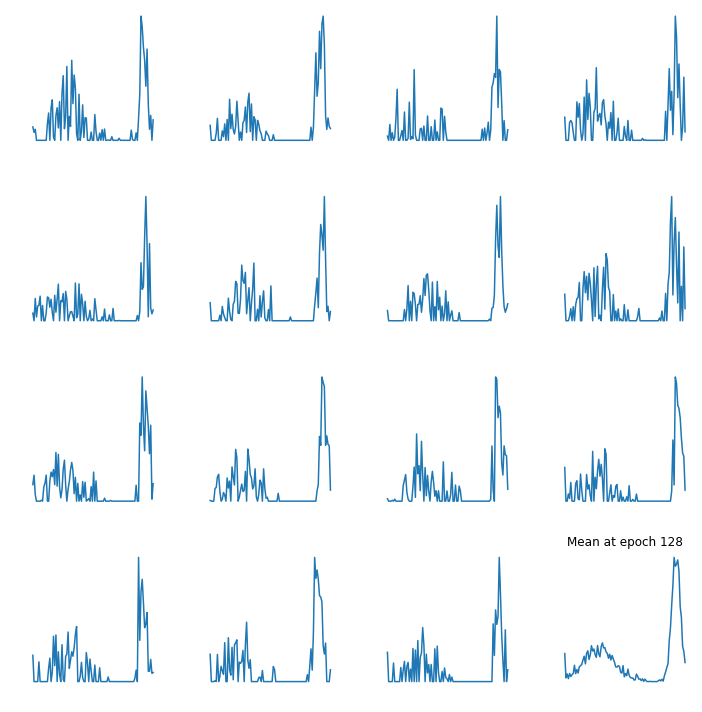

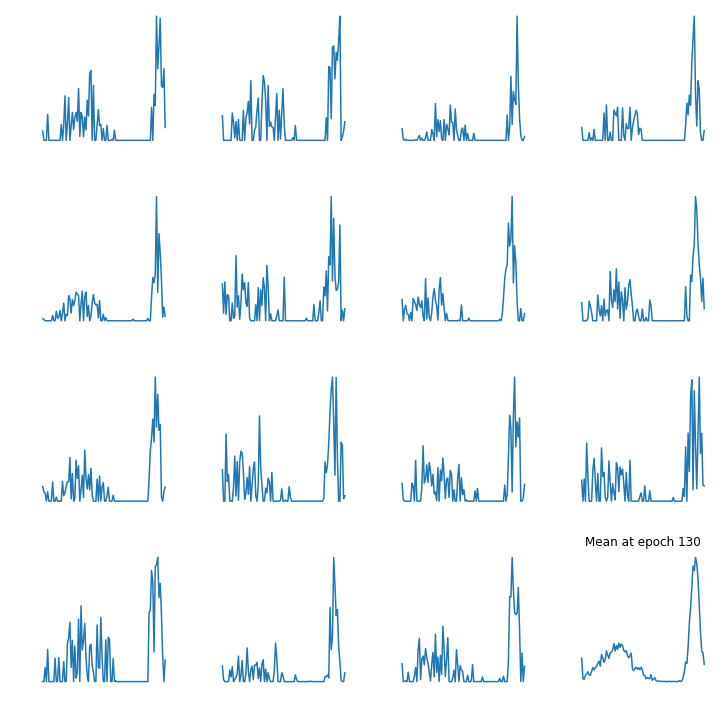

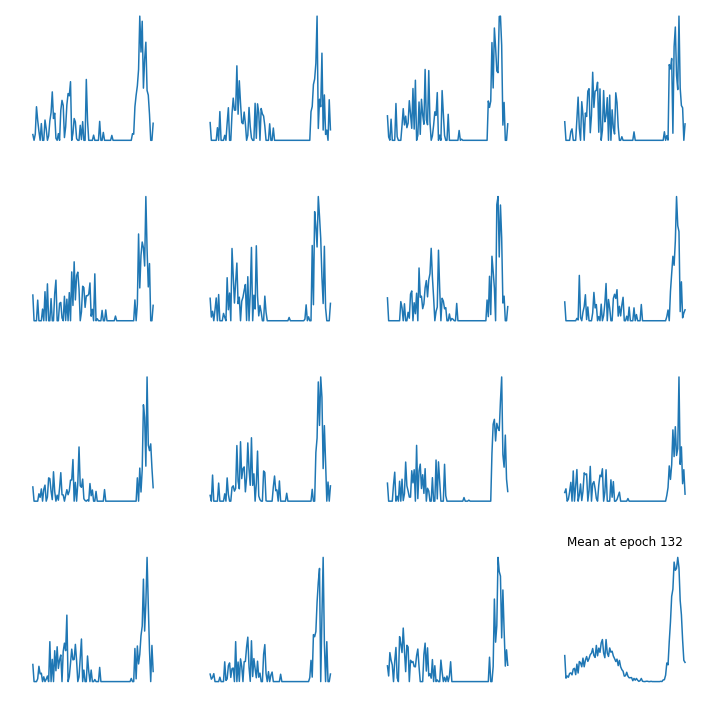

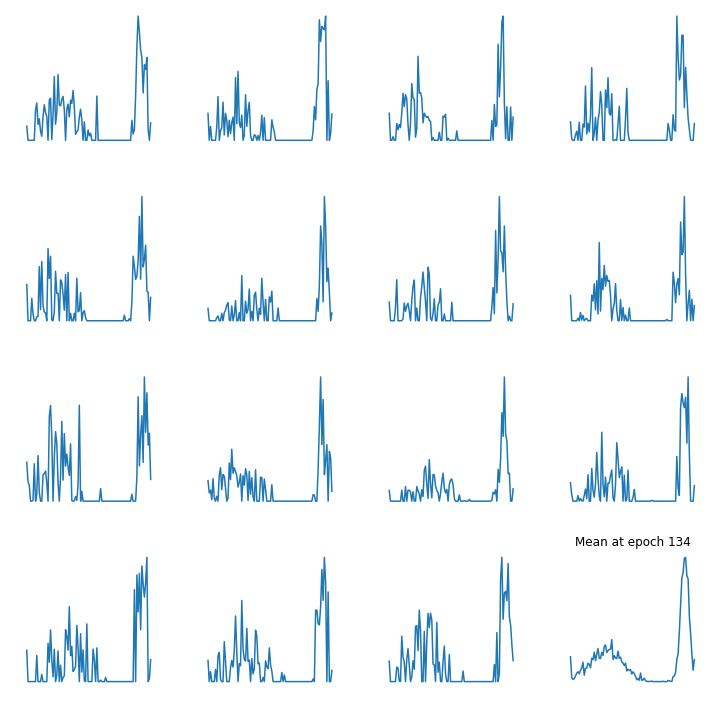

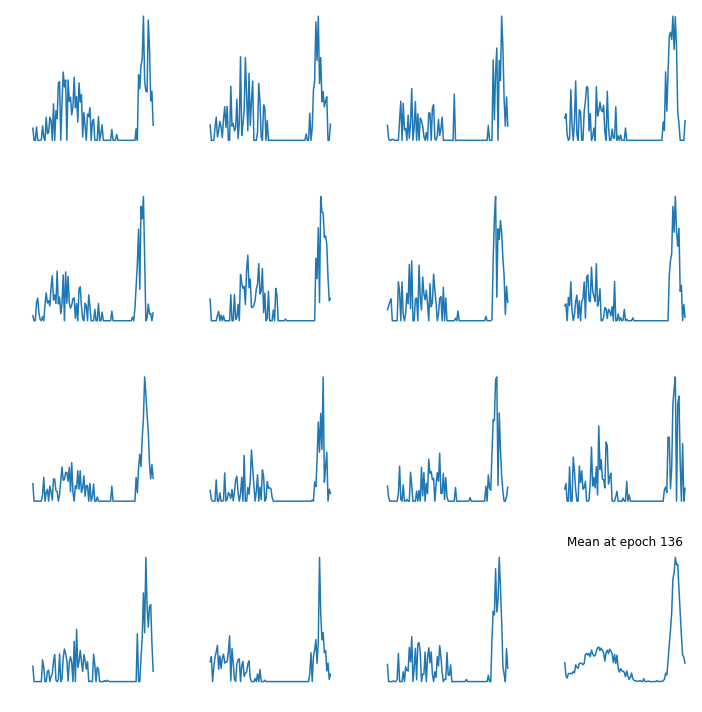

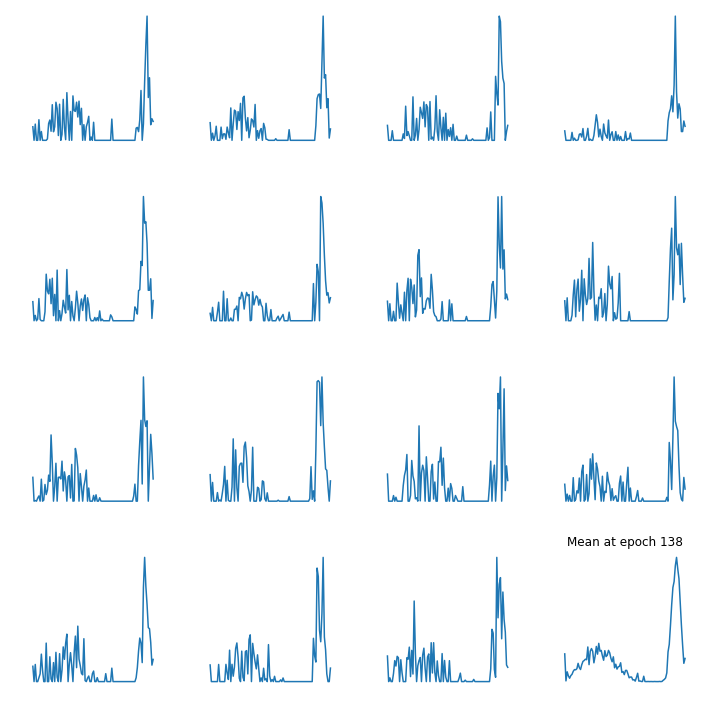

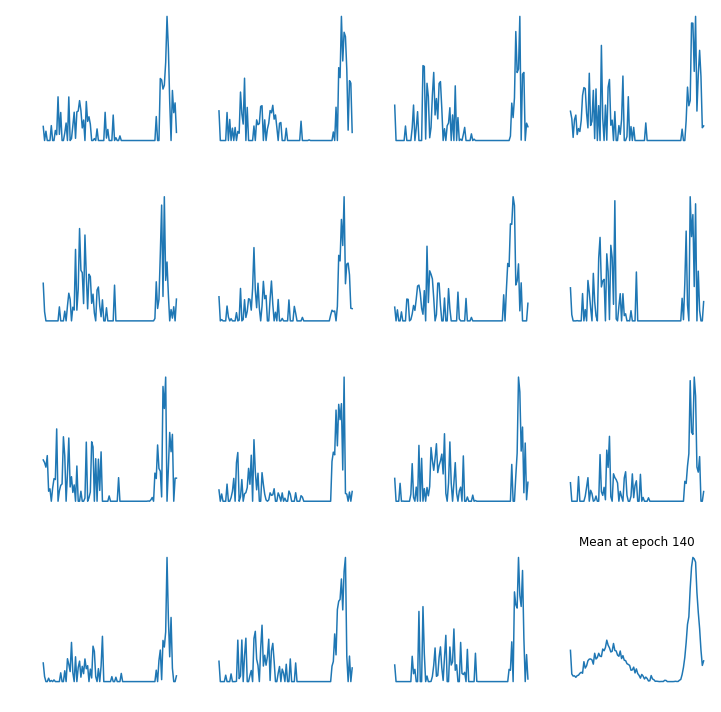

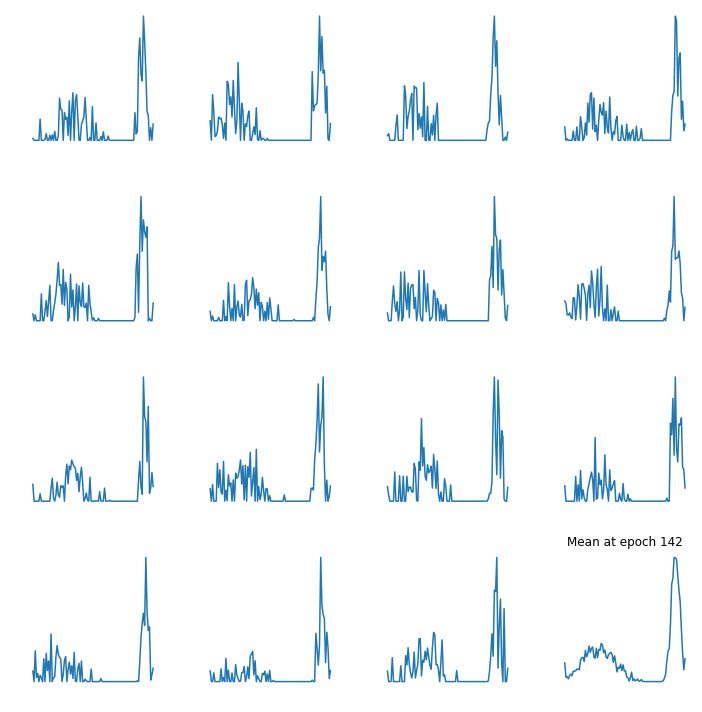

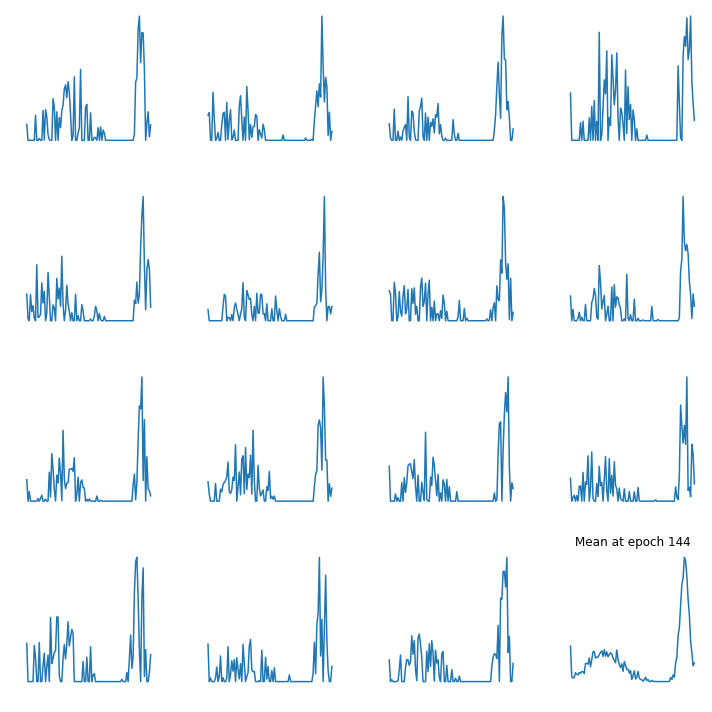

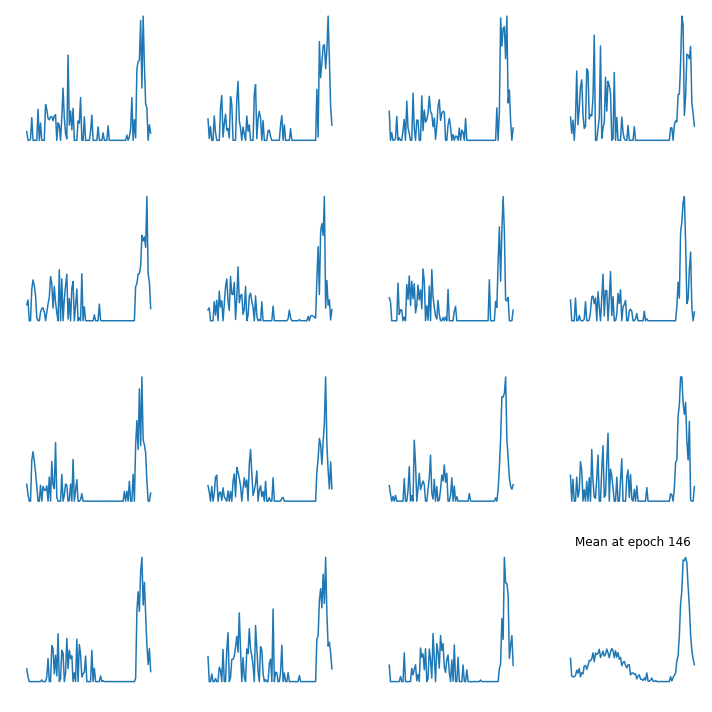

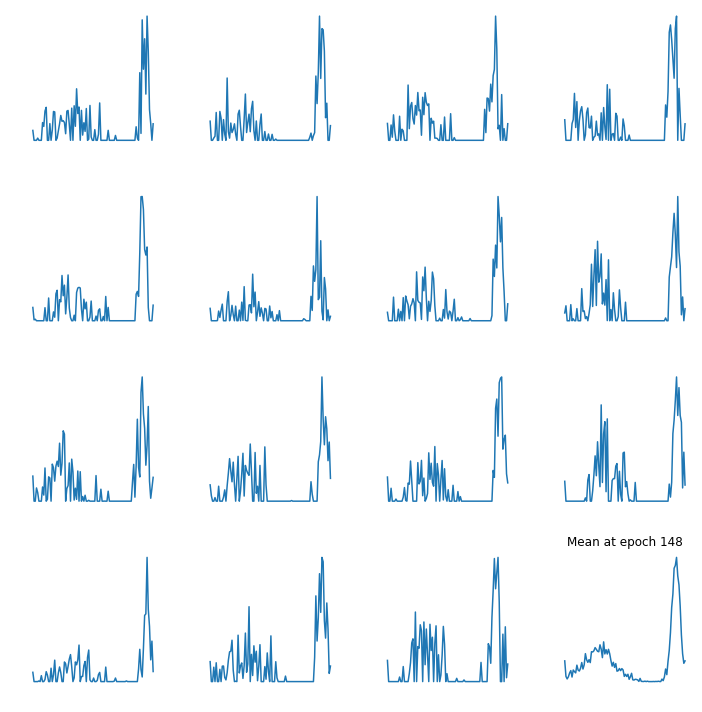

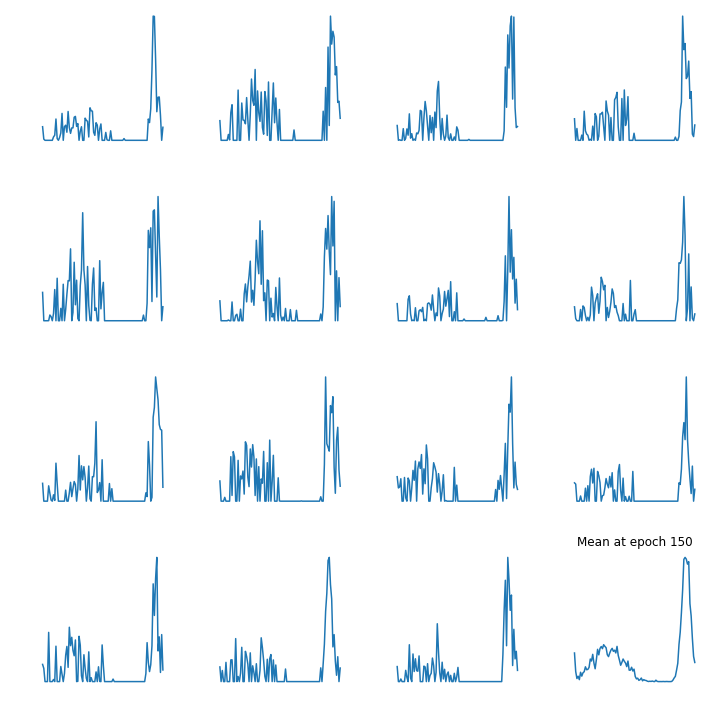

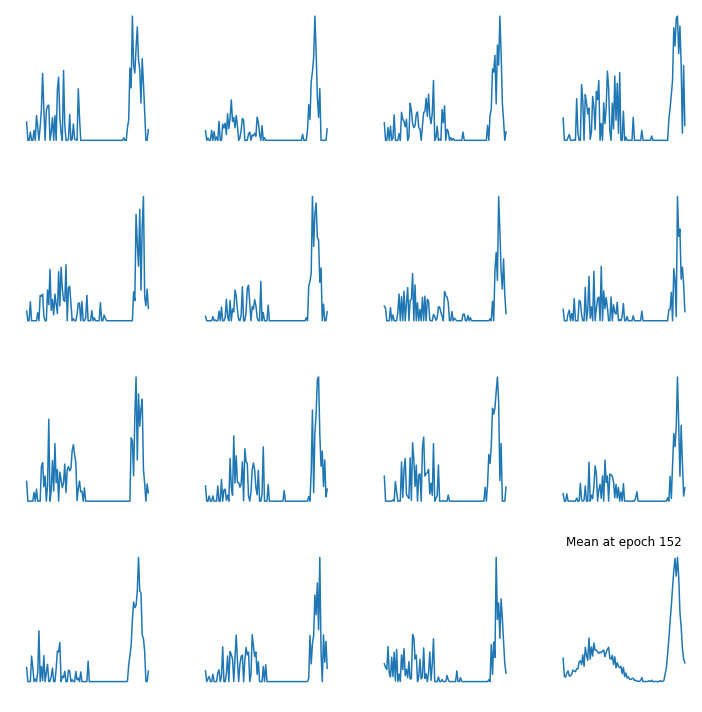

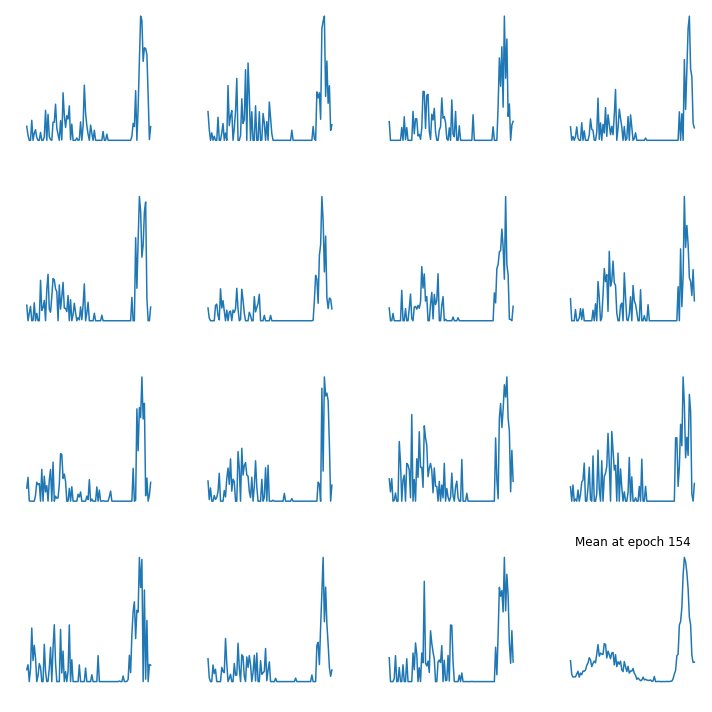

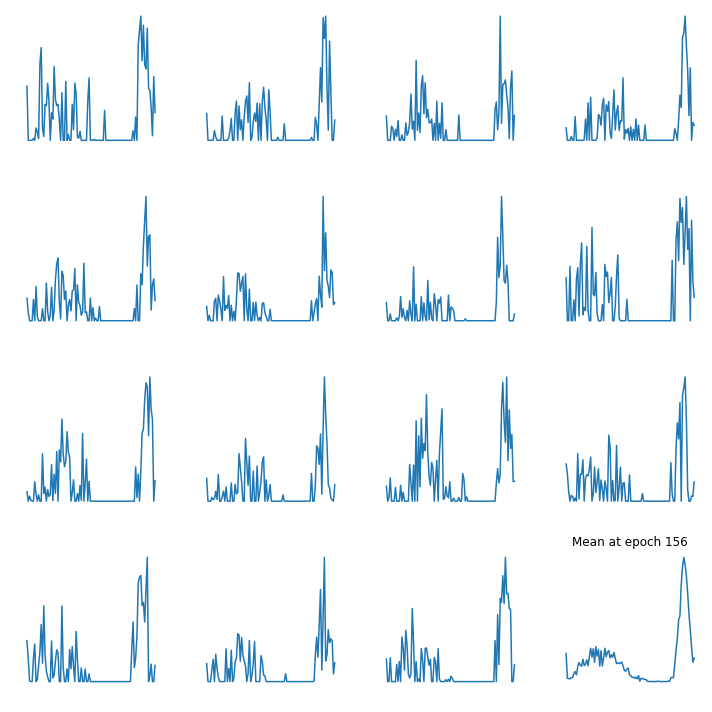

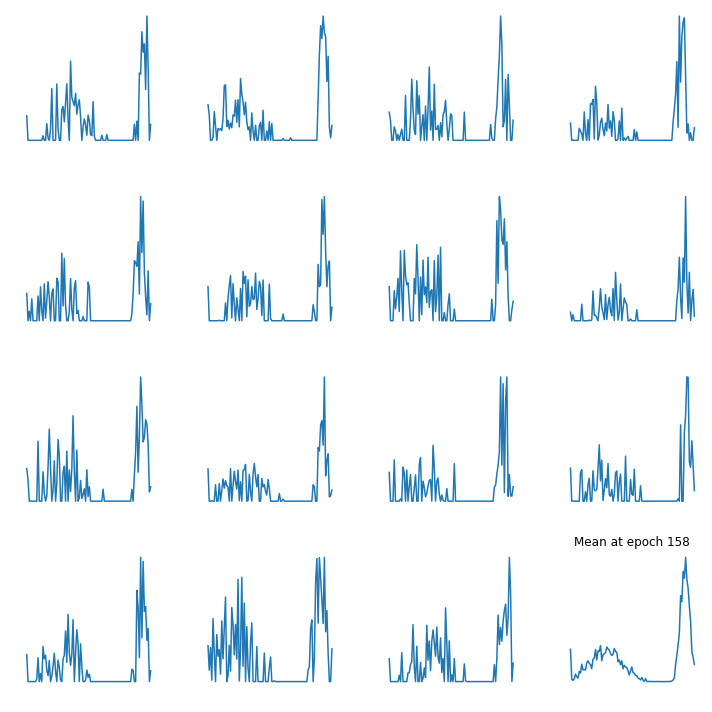

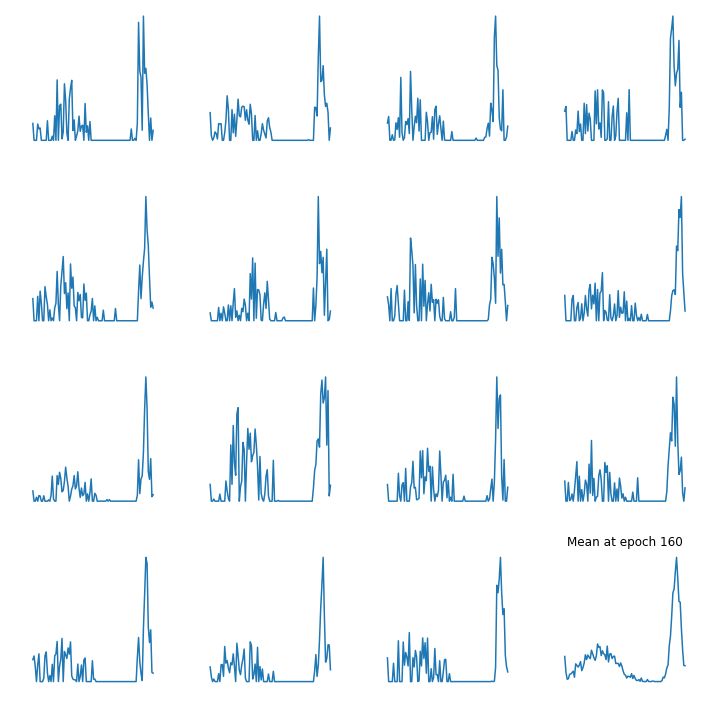

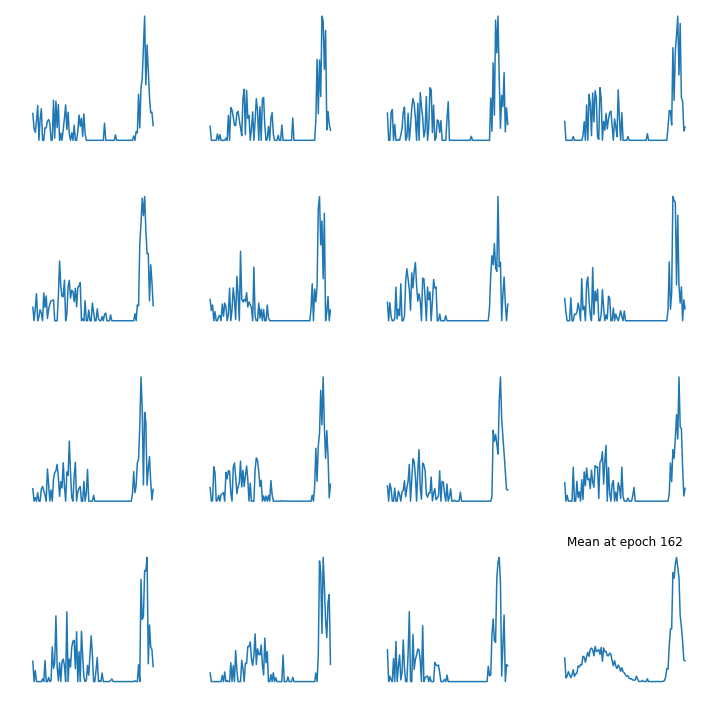

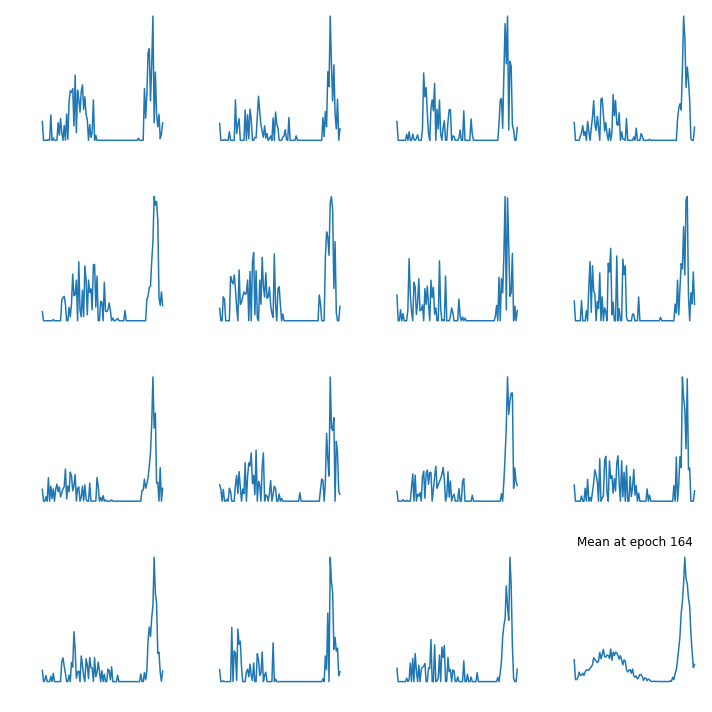

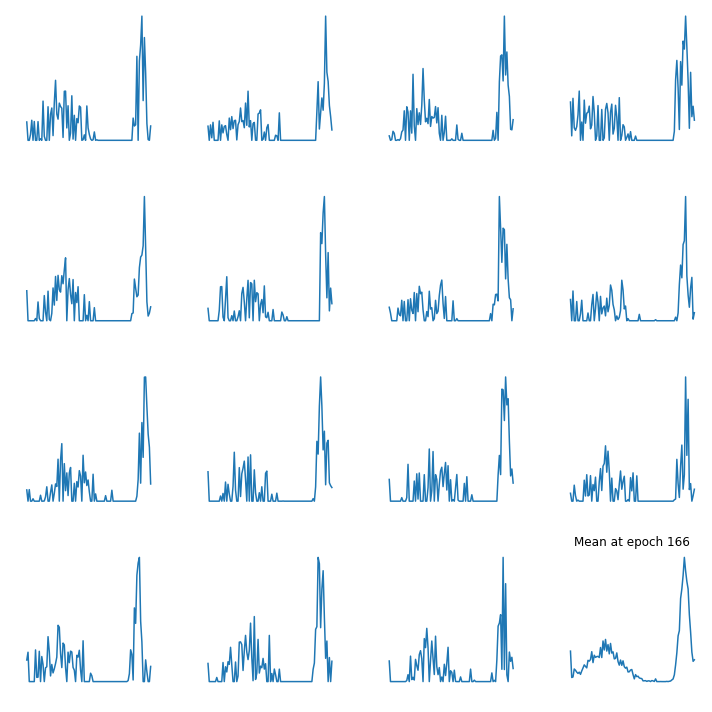

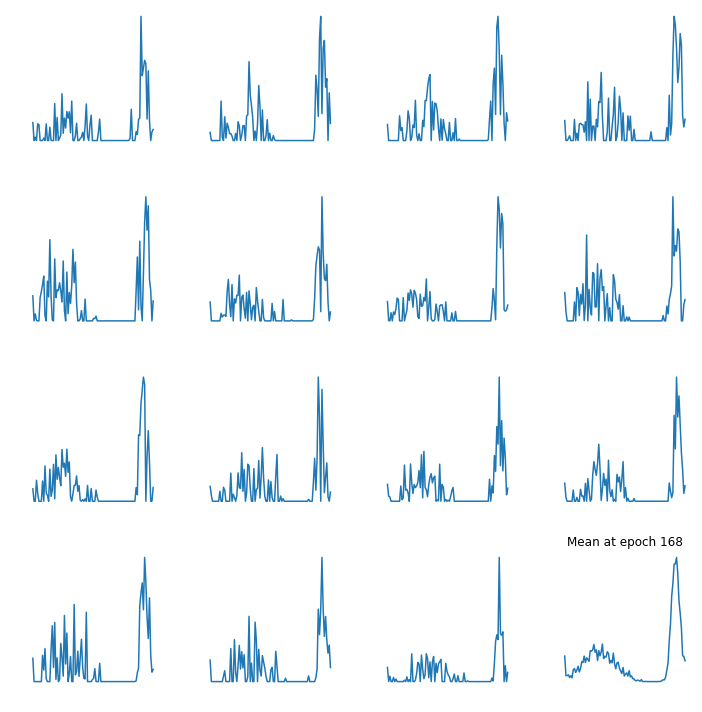

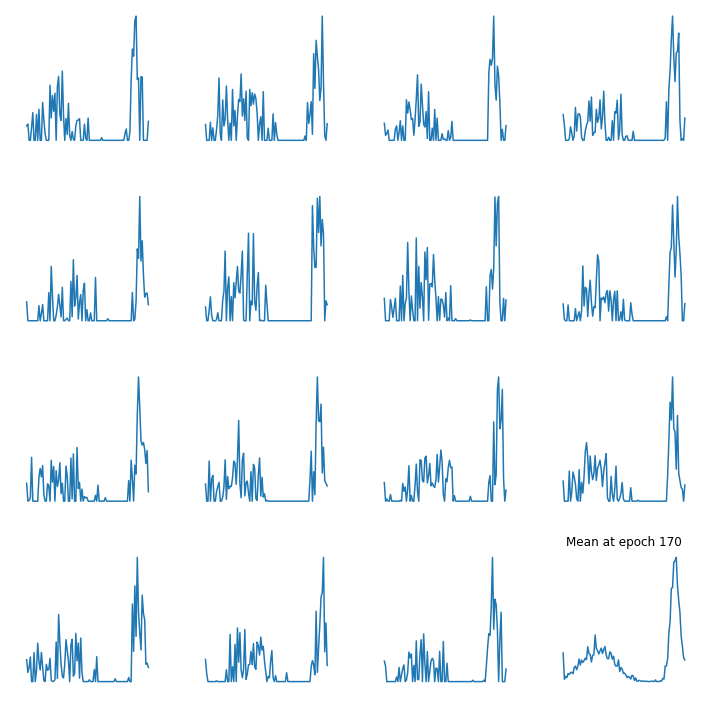

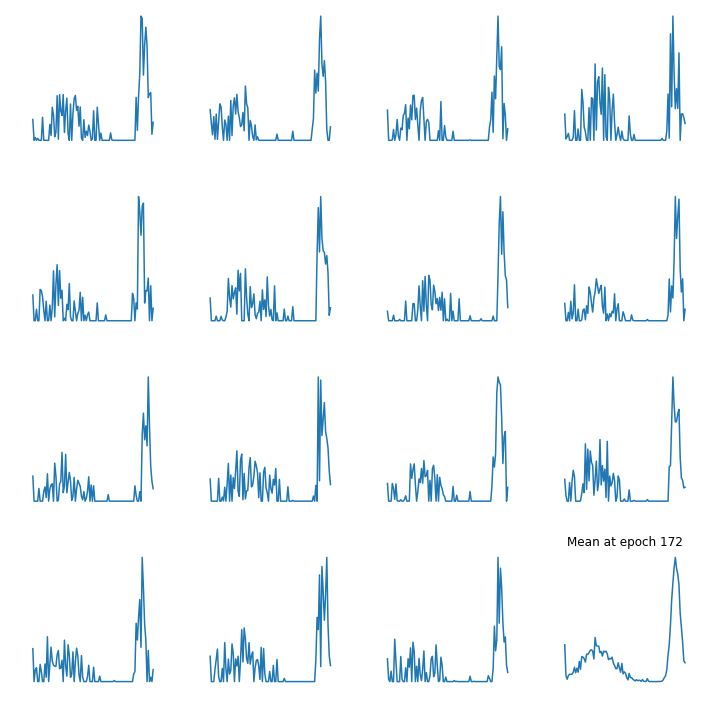

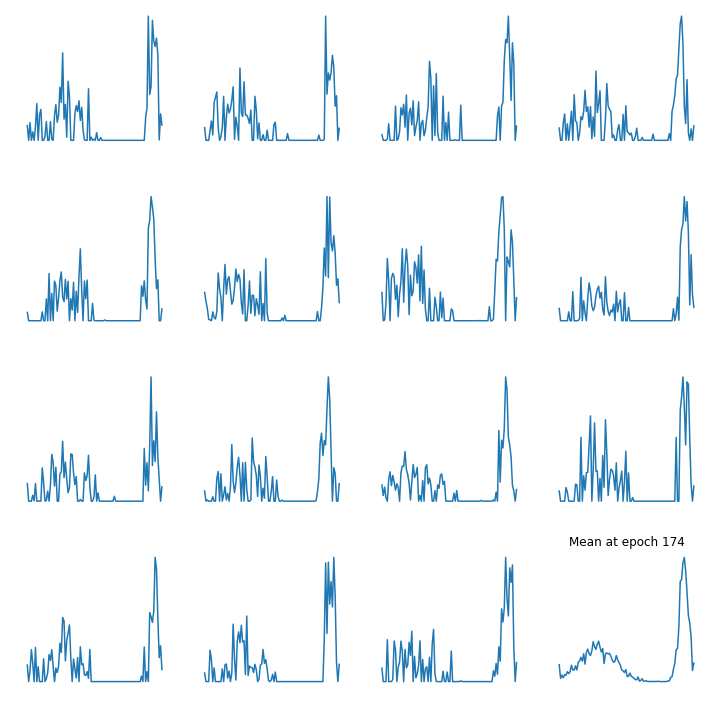

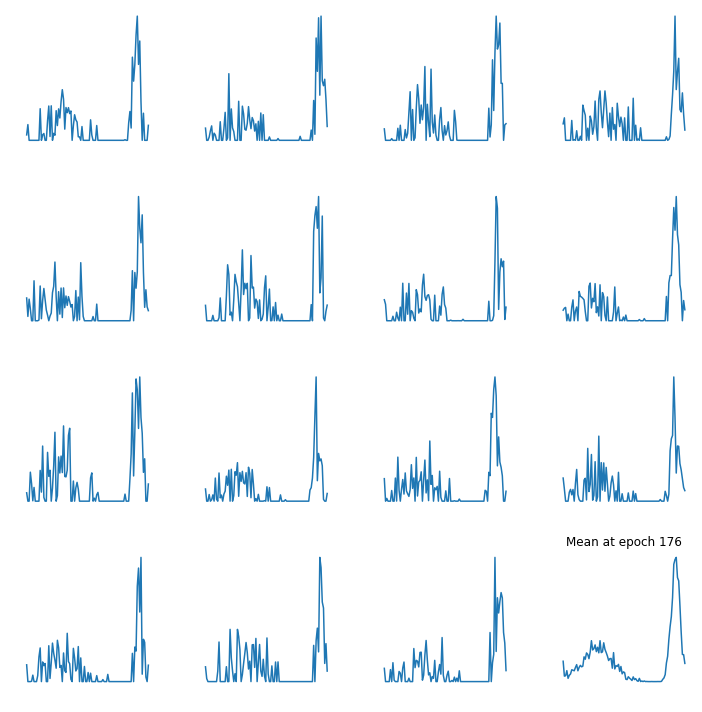

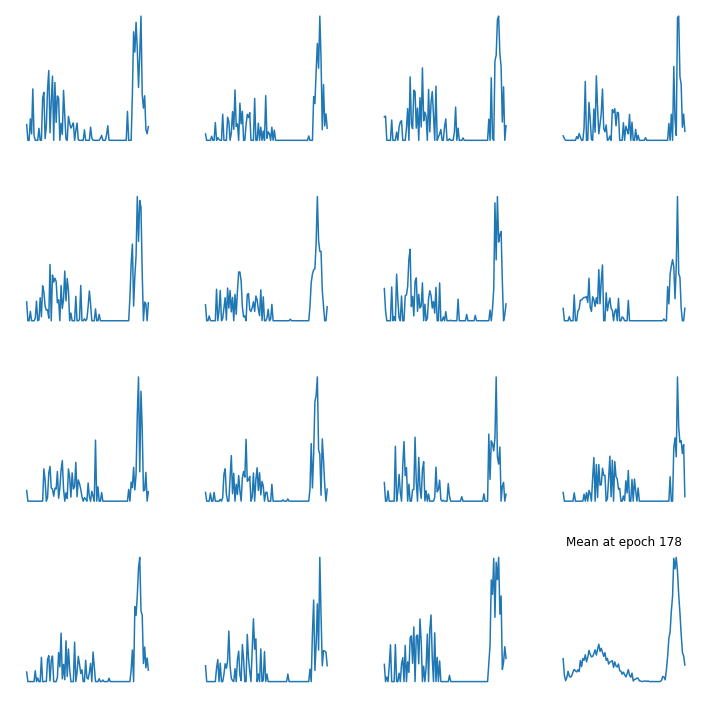

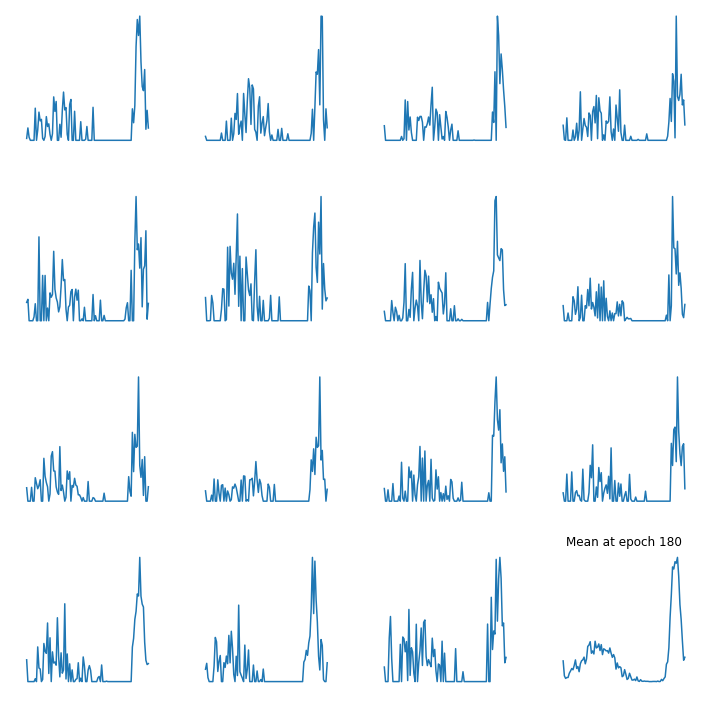

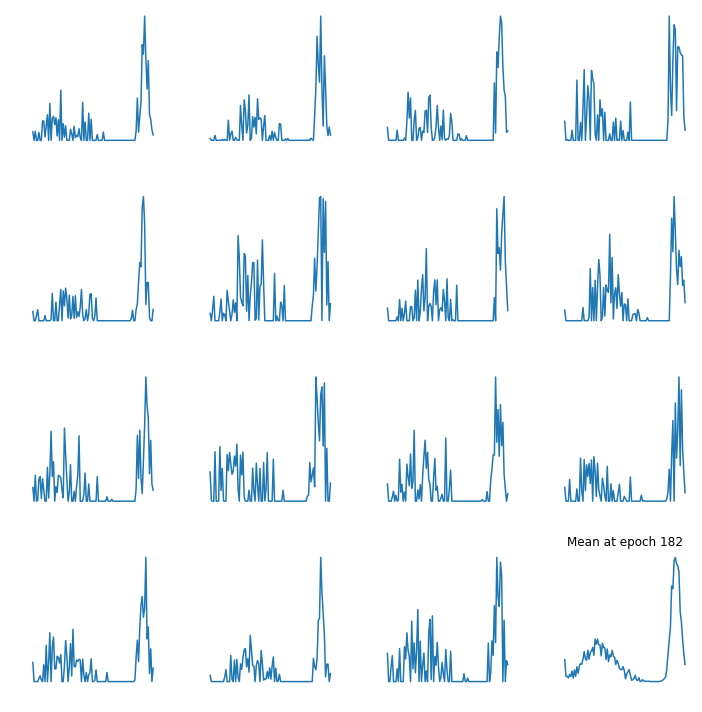

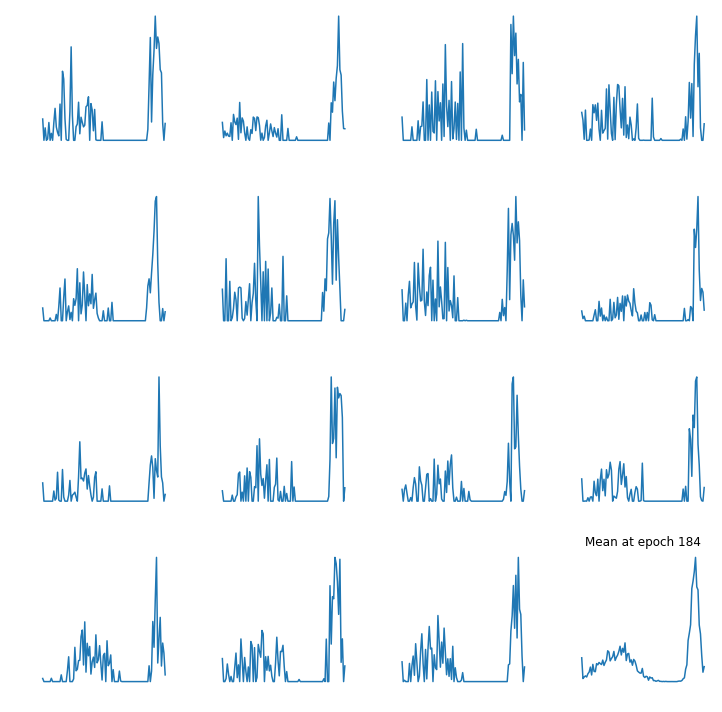

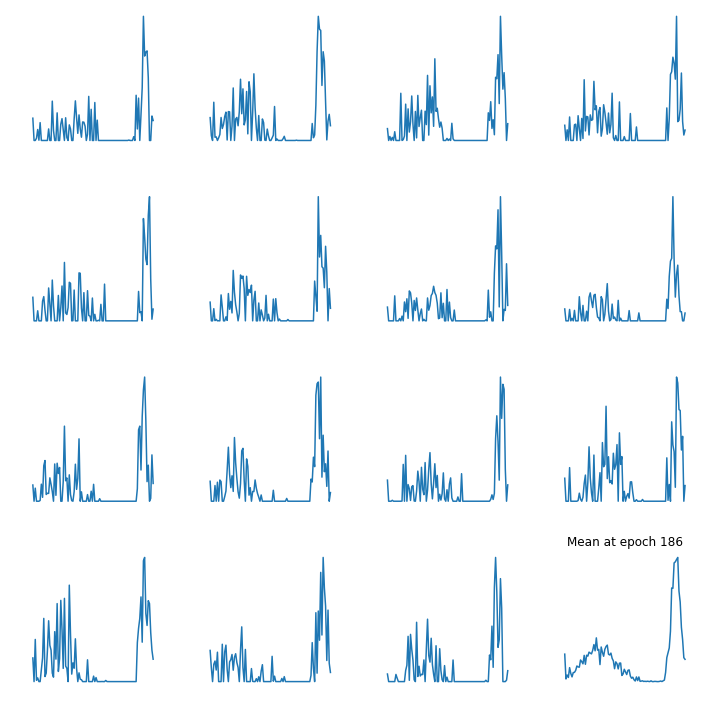

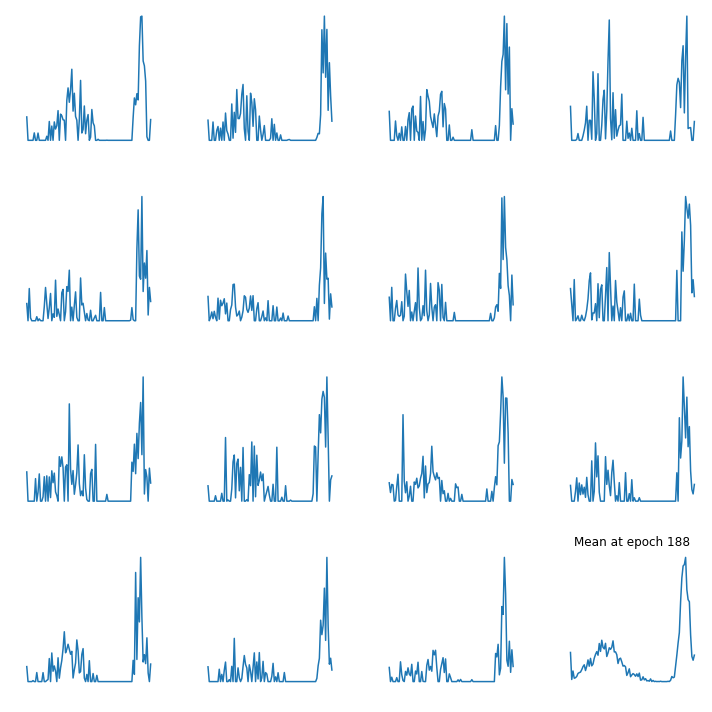

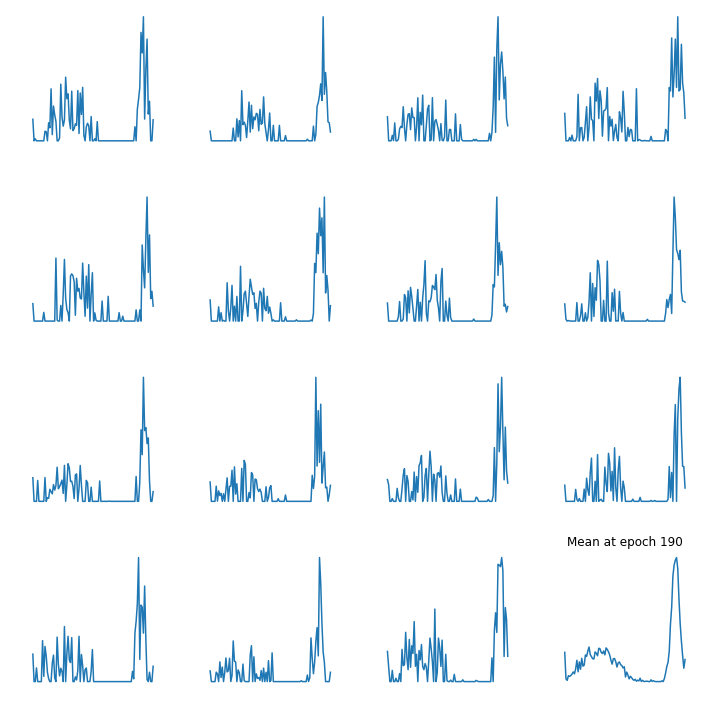

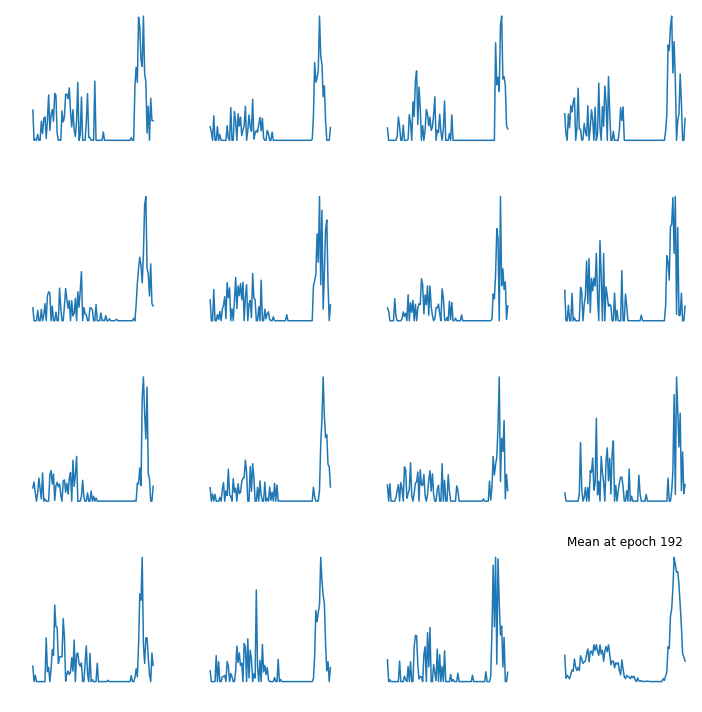

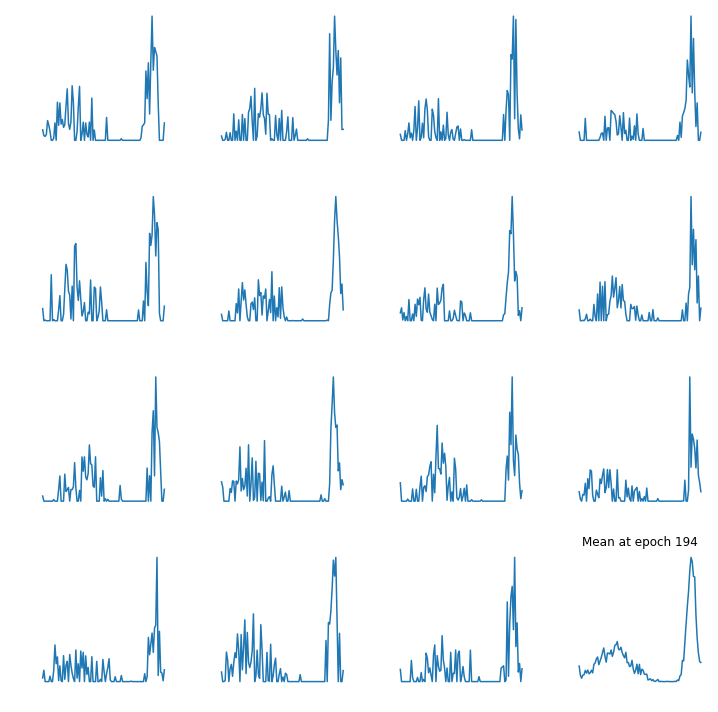

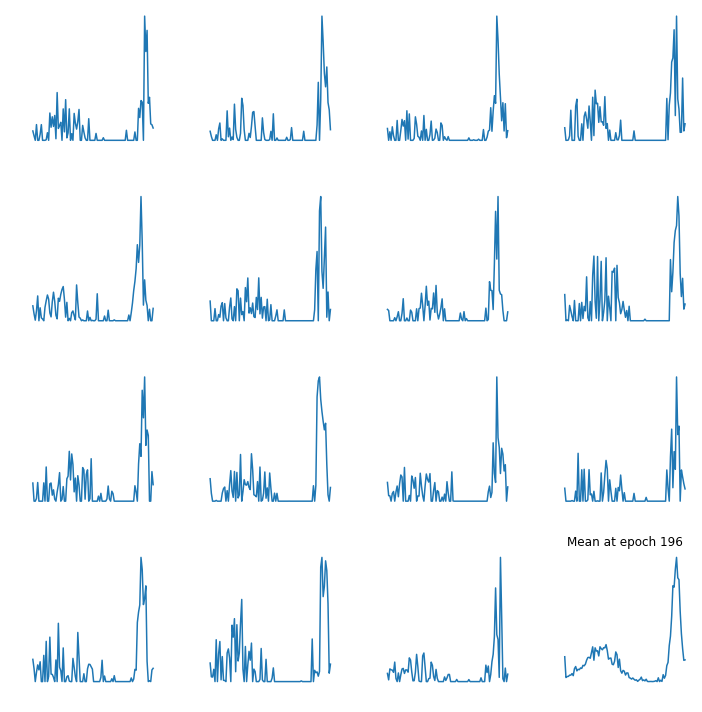

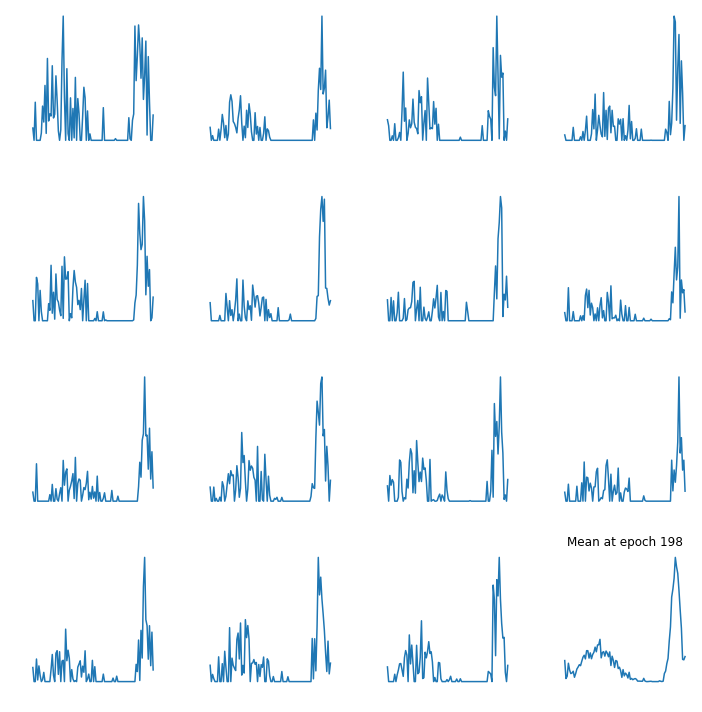

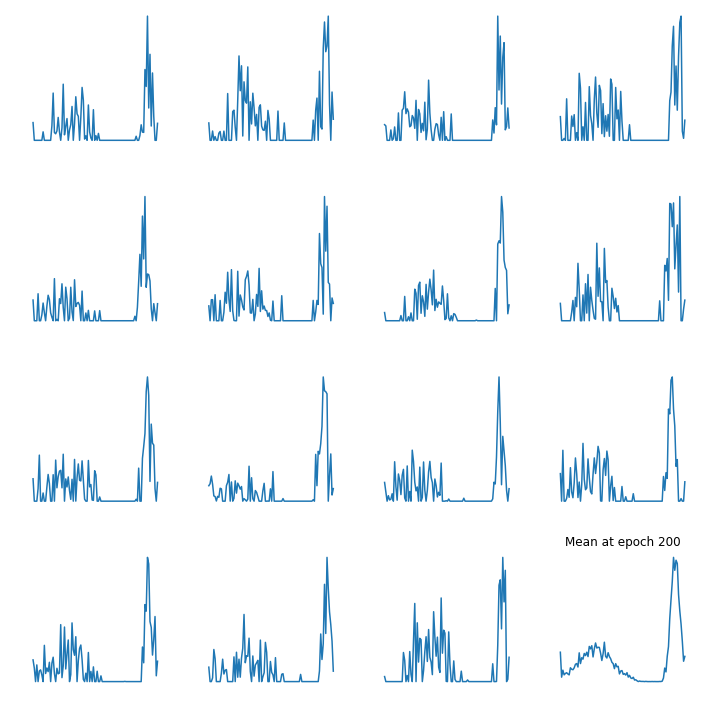

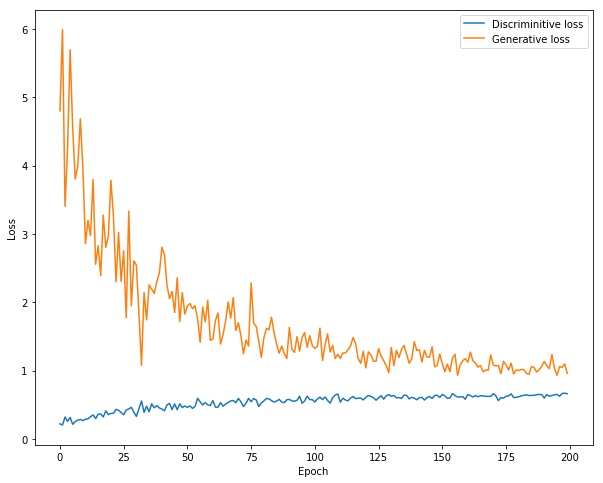

In [92]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
#from tqdm import tqdm
import matplotlib.pyplot as plt

from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Convolution2D, UpSampling2D
from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K
from keras import initializers

K.set_image_dim_ordering('th')

# Deterministic output.
# Tired of seeing the same results every time? Remove the line below.
np.random.seed(1000)

# The results are a little better when the dimensionality of the random vector is only 10.
# The dimensionality has been left at 100 for consistency with other GAN implementations.
randomDim = 100

# Load MNIST data
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train = (X_train.astype(np.float32) - 127.5)/127.5
#X_train = X_train.reshape(60000, 784)

# Optimizer
adam = Adam(lr=0.0002, beta_1=0.5)

generator = Sequential()
generator.add(Dense(256, input_dim=randomDim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(n, activation='relu'))
generator.compile(loss='mse', optimizer=adam)

discriminator = Sequential()
discriminator.add(Dense(1024, input_dim=n, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

# Combined network
discriminator.trainable = False
ganInput = Input(shape=(randomDim,))
x = generator(ganInput)
ganOutput = discriminator(x)
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=adam)

dLosses = []
gLosses = []

# Plot the loss from each batch
def plotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('./gan/gan_loss_example2_epoch_%d.png' % epoch)

# Create a wall of generated  images
def plotGeneratedImages(epoch, examples=15, dim=(4, 4), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.plot(generatedImages[i])
        plt.axis('off')
    plt.subplot(dim[0], dim[1],16)
    plt.plot(np.mean(generator.predict(np.random.normal(0, 1, size=[100, randomDim])),axis=0))
    plt.axis('off')
    plt.title("Mean at epoch "+ str(epoch))
    plt.tight_layout()
    plt.savefig('./plots/gan_generated_image_example2_epoch_%d.png' % epoch)

    
    
# Save the generator and discriminator networks (and weights) for later use
def saveModels(epoch):
    generator.save('./models/gan_generator_example2_epoch_%d.h5' % epoch)
    discriminator.save('./models/gan_discriminator_example2_epoch_%d.h5' % epoch)

def train(epochs=1, batchSize=128):
    batchCount = X_train.shape[0] // batchSize
    print('Epochs:', epochs)
    print('Batch size:', batchSize)
    print('Batches per epoch:', batchCount)

    plotGeneratedImages(0)
    
    for e in range(1, epochs+1):
        print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in range(batchCount):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batchSize)]

            # Generate fake MNIST images
            generatedImages = generator.predict(noise)
            # print np.shape(imageBatch), np.shape(generatedImages)
            X = np.concatenate([imageBatch, generatedImages])

            # Labels for generated and real data
            yDis = np.zeros(2*batchSize)
            # One-sided label smoothing
            yDis[:batchSize] = 0.9

            # Train discriminator
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            yGen = np.ones(batchSize)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        # Store loss of most recent batch from this epoch
        dLosses.append(dloss)
        gLosses.append(gloss)

        if e == 1 or e % 2 == 0 or e == 0:
            plotGeneratedImages(e)
            saveModels(e)

    # Plot losses from every epoch
    plotLoss(e)

if __name__ == '__main__':
    train(200, 100)

In [87]:
X_train.shape

(10000, 100)